# Load the Dataset

In [1]:
import h5py

# Open the HDF5 file
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
with h5py.File(file_path, 'r') as file:
    # List all groups
    for key in file.keys():
        print(key)
        # List all datasets in the group
        group = file[key]
        for dataset in group.keys():
            print(f"  {dataset}: {group[dataset].shape}")

command_line_arguments
injection_parameters
  coa_phase: (100000,)
  dec: (100000,)
  h1_signal: (100000, 512)
  h1_snr: (100000,)
  inclination: (100000,)
  injection_snr: (100000,)
  l1_signal: (100000, 512)
  l1_snr: (100000,)
  mass1: (100000,)
  mass2: (100000,)
  nomf_snr: (100000,)
  polarization: (100000,)
  ra: (100000,)
  scale_factor: (100000,)
  spin1z: (100000,)
  spin2z: (100000,)
  v1_signal: (100000, 512)
  v1_snr: (100000,)
injection_samples
  event_time: (100000,)
  h1_strain: (100000, 512)
  l1_strain: (100000, 512)
  v1_strain: (100000, 512)
noise_samples
  event_time: None
  h1_strain: None
  l1_strain: None
  v1_strain: None
static_arguments


In [2]:
#   coa_phase: The coalescence phase of the binary merger, which is a measure of the phase of the gravitational wave signal at the moment of merger.
#   dec: The declination (angular distance from the celestial equator) of the source in the sky.
#   h1_signal, l1_signal, v1_signal: The simulated gravitational wave signals in the Hanford (H1), Livingston (L1), and Virgo (V1) detectors, respectively. Each signal has a shape of (100000, 512), indicating 100,000 samples with 512 (overlapping subsequences) time steps each.
#   h1_snr, l1_snr, v1_snr: The signal-to-noise ratios (SNRs) of the simulated signals in each detector.
#   inclination: The inclination angle of the binary orbit with respect to the line of sight.
#   injection_snr: The overall SNR of the injection.
#   mass1, mass2: The masses of the two merging compact objects.
#   nomf_snr: The non-modal frequency SNR, which is a measure of the signal power in a specific frequency band.
#   polarization: The polarisation angle of the gravitational wave signal.
#   ra: The right ascension (angular distance from the vernal equinox) of the source in the sky.
#   scale_factor: A scaling factor applied to the simulated signal.
#   spin1z, spin2z: The z-components of the spin vectors of the two merging compact objects.

In [3]:
import h5py

# Open the HDF5 file
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'
with h5py.File(file_path, 'r') as file:
    # List all groups
    for key in file.keys():
        print(key)
        # List all datasets in the group
        group = file[key]
        for dataset in group.keys():
            print(f"  {dataset}: {group[dataset].shape}")

command_line_arguments
injection_parameters
  coa_phase: (25,)
  dec: (25,)
  h1_signal: (25, 512)
  h1_snr: (25,)
  inclination: (25,)
  injection_snr: (25,)
  l1_signal: (25, 512)
  l1_snr: (25,)
  mass1: (25,)
  mass2: (25,)
  nomf_snr: (25,)
  polarization: (25,)
  ra: (25,)
  scale_factor: (25,)
  spin1z: (25,)
  spin2z: (25,)
  v1_signal: (25, 512)
  v1_snr: (25,)
injection_samples
  event_time: (25,)
  h1_strain: (25, 512)
  l1_strain: (25, 512)
  v1_strain: (25, 512)
noise_samples
  event_time: None
  h1_strain: None
  l1_strain: None
  v1_strain: None
static_arguments


In [4]:
# The above file is the test file (unseen data) that will be used to evaluate the performance of the model.

# Exploratory Data Analysis

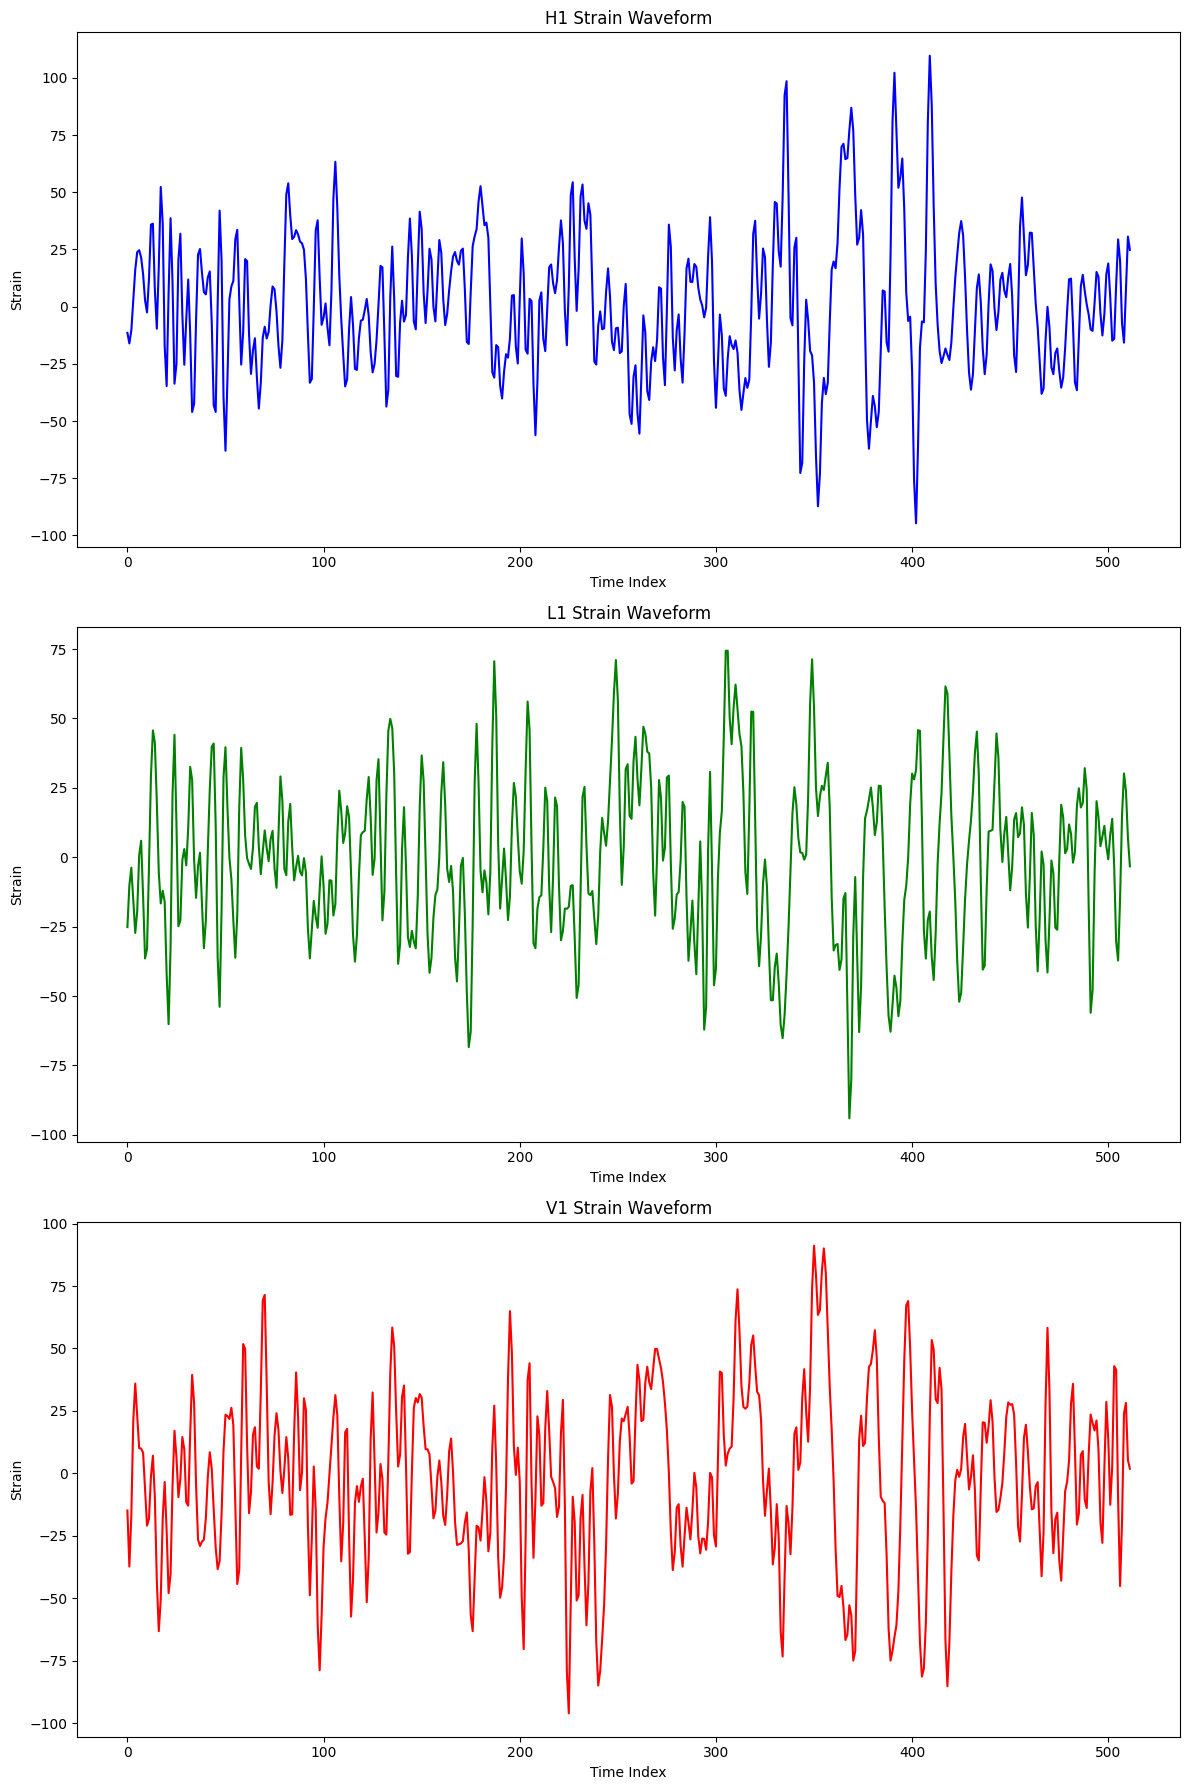

In [5]:
import h5py
import matplotlib.pyplot as plt

def strain_plot(file_path, detectors=['h1', 'l1', 'v1']):
    colours = ['blue', 'green', 'red'] 
    with h5py.File(file_path, 'r') as file:
        fig, axs = plt.subplots(len(detectors), 1, figsize=(12, 6*len(detectors)))
        for i, detector in enumerate(detectors):
            # Extract strain data for the detector
            strain_data = file[f'injection_samples/{detector}_strain'][:]
            
            # Plot the strain waveform data
            axs[i].plot(strain_data[0], color=colours[i])
            axs[i].set_title(f'{detector.upper()} Strain Waveform')
            axs[i].set_xlabel('Time Index')
            axs[i].set_ylabel('Strain')
        plt.tight_layout()
        plt.show()

# Define the file path
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'

# Plot waveforms separately for H1, L1, and V1 detectors
strain_plot(file_path, detectors=['h1', 'l1', 'v1'])

In [6]:
# The graph above represents a sample of the strain data (gravitational wave with noise artifacts) obtained from each detector.

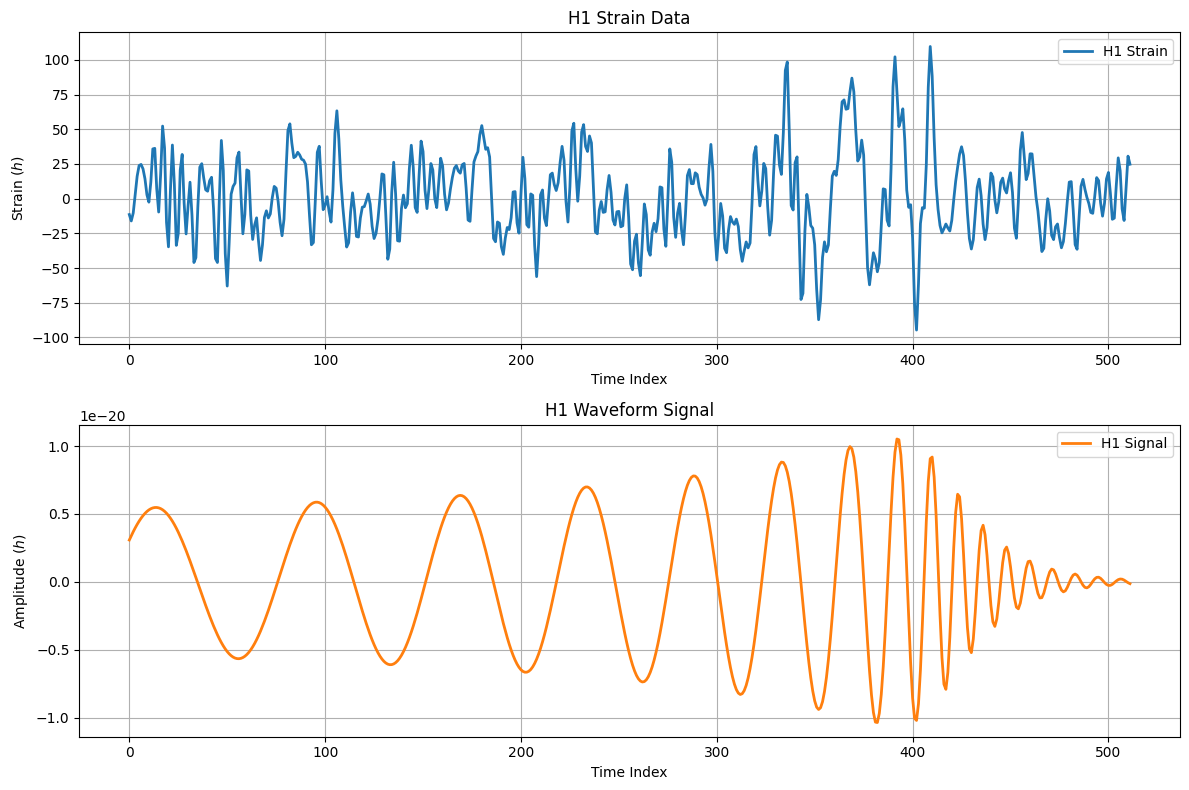

In [7]:
import h5py
import matplotlib.pyplot as plt

# Define the file path
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'

# Function to plot strain data and waveform signal for a given detector
def plot_waveform(file_path, detector):
    with h5py.File(file_path, 'r') as file:
        # Extract strain data and waveform signal for the detector
        strain_data = file[f'injection_samples/{detector}_strain'][:]
        waveform_data = file[f'injection_parameters/{detector}_signal'][:]
        
        # Plot the first example of strain data
        plt.figure(figsize=(12, 8))
        
        # Strain data plot
        plt.subplot(2, 1, 1)
        plt.plot(strain_data[0], label=f'{detector.upper()} Strain', color='#1f77b4', linewidth=2)
        plt.title(f'{detector.upper()} Strain Data')
        plt.xlabel('Time Index')
        plt.ylabel(r'Strain ($h$)')
        plt.grid(True)
        plt.legend()
        
        # Waveform signal plot
        plt.subplot(2, 1, 2)
        plt.plot(waveform_data[0], label=f'{detector.upper()} Signal', color='#ff7f0e', linewidth=2)
        plt.title(f'{detector.upper()} Waveform Signal')
        plt.xlabel('Time Index')
        plt.ylabel(r'Amplitude ($h$)')
        plt.grid(True)
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Plot strain data and waveform signal for H1 detector
plot_waveform(file_path, 'h1')

In [8]:
# Here you can see an example of noisy data (h1_strain) along with its corresponding pure GW signal (h1_signal).
# The strain data will be used as the training data, whereas the pure waveform signal will be the target data (ground truth).

2024-08-01 11:59:10.991353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 11:59:10.991505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 11:59:11.153124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


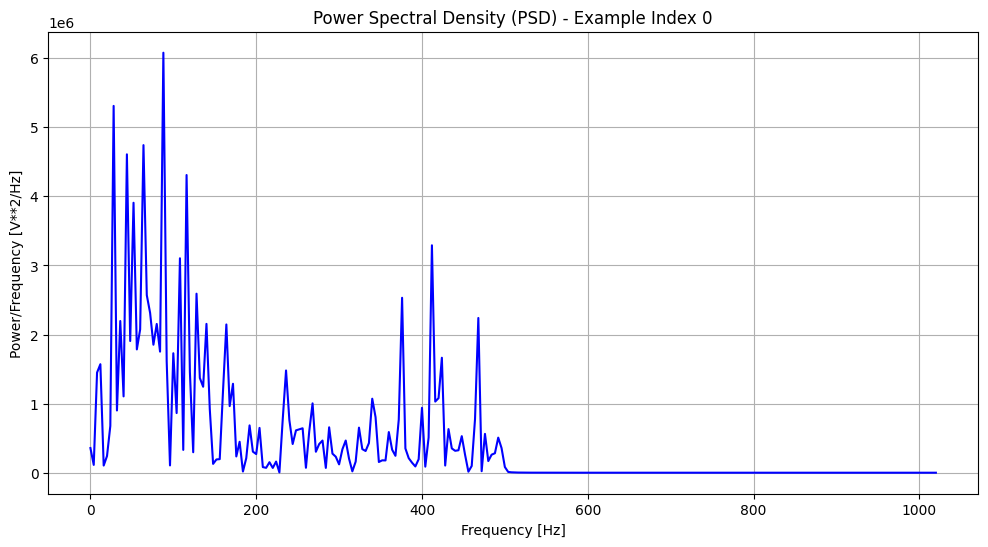

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def load_strain_data(file_path):
    with h5py.File(file_path, 'r') as file:
        return file['injection_samples/h1_strain'][:]

def plot_psd(strain_data, example_index=0):
    signal = strain_data[example_index]
    sample_rate = 2048

    fft = tf.signal.fft(tf.cast(signal, tf.complex64))
    psd = tf.abs(fft) ** 2
    psd = psd.numpy()

    freq = np.fft.fftfreq(len(signal), d=1/sample_rate)

    plt.figure(figsize=(12, 6))
    plt.plot(freq[:len(signal) // 2], psd[:len(signal) // 2], color='blue')
    plt.title(f'Power Spectral Density (PSD) - Example Index {example_index}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [V**2/Hz]')
    plt.grid(True)
    plt.show()

file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
h1_strain = load_strain_data(file_path)
plot_psd(h1_strain, example_index=0)

In [10]:
# The above graph allows us to measure the signal's intesity at a frequency of 2048Hz. The peaks in the y-axis indicate
# a higher signal intensity (i.e., 100Hz), where a gravitional wave is likely to be present. 
# In this case, the signal contains substantiantal oscillations caused by a binary black hole merger event. 
# On the other hand, a flat plot would indicate a signal that is dominated by random noise (i.e., 450Hz onwards).

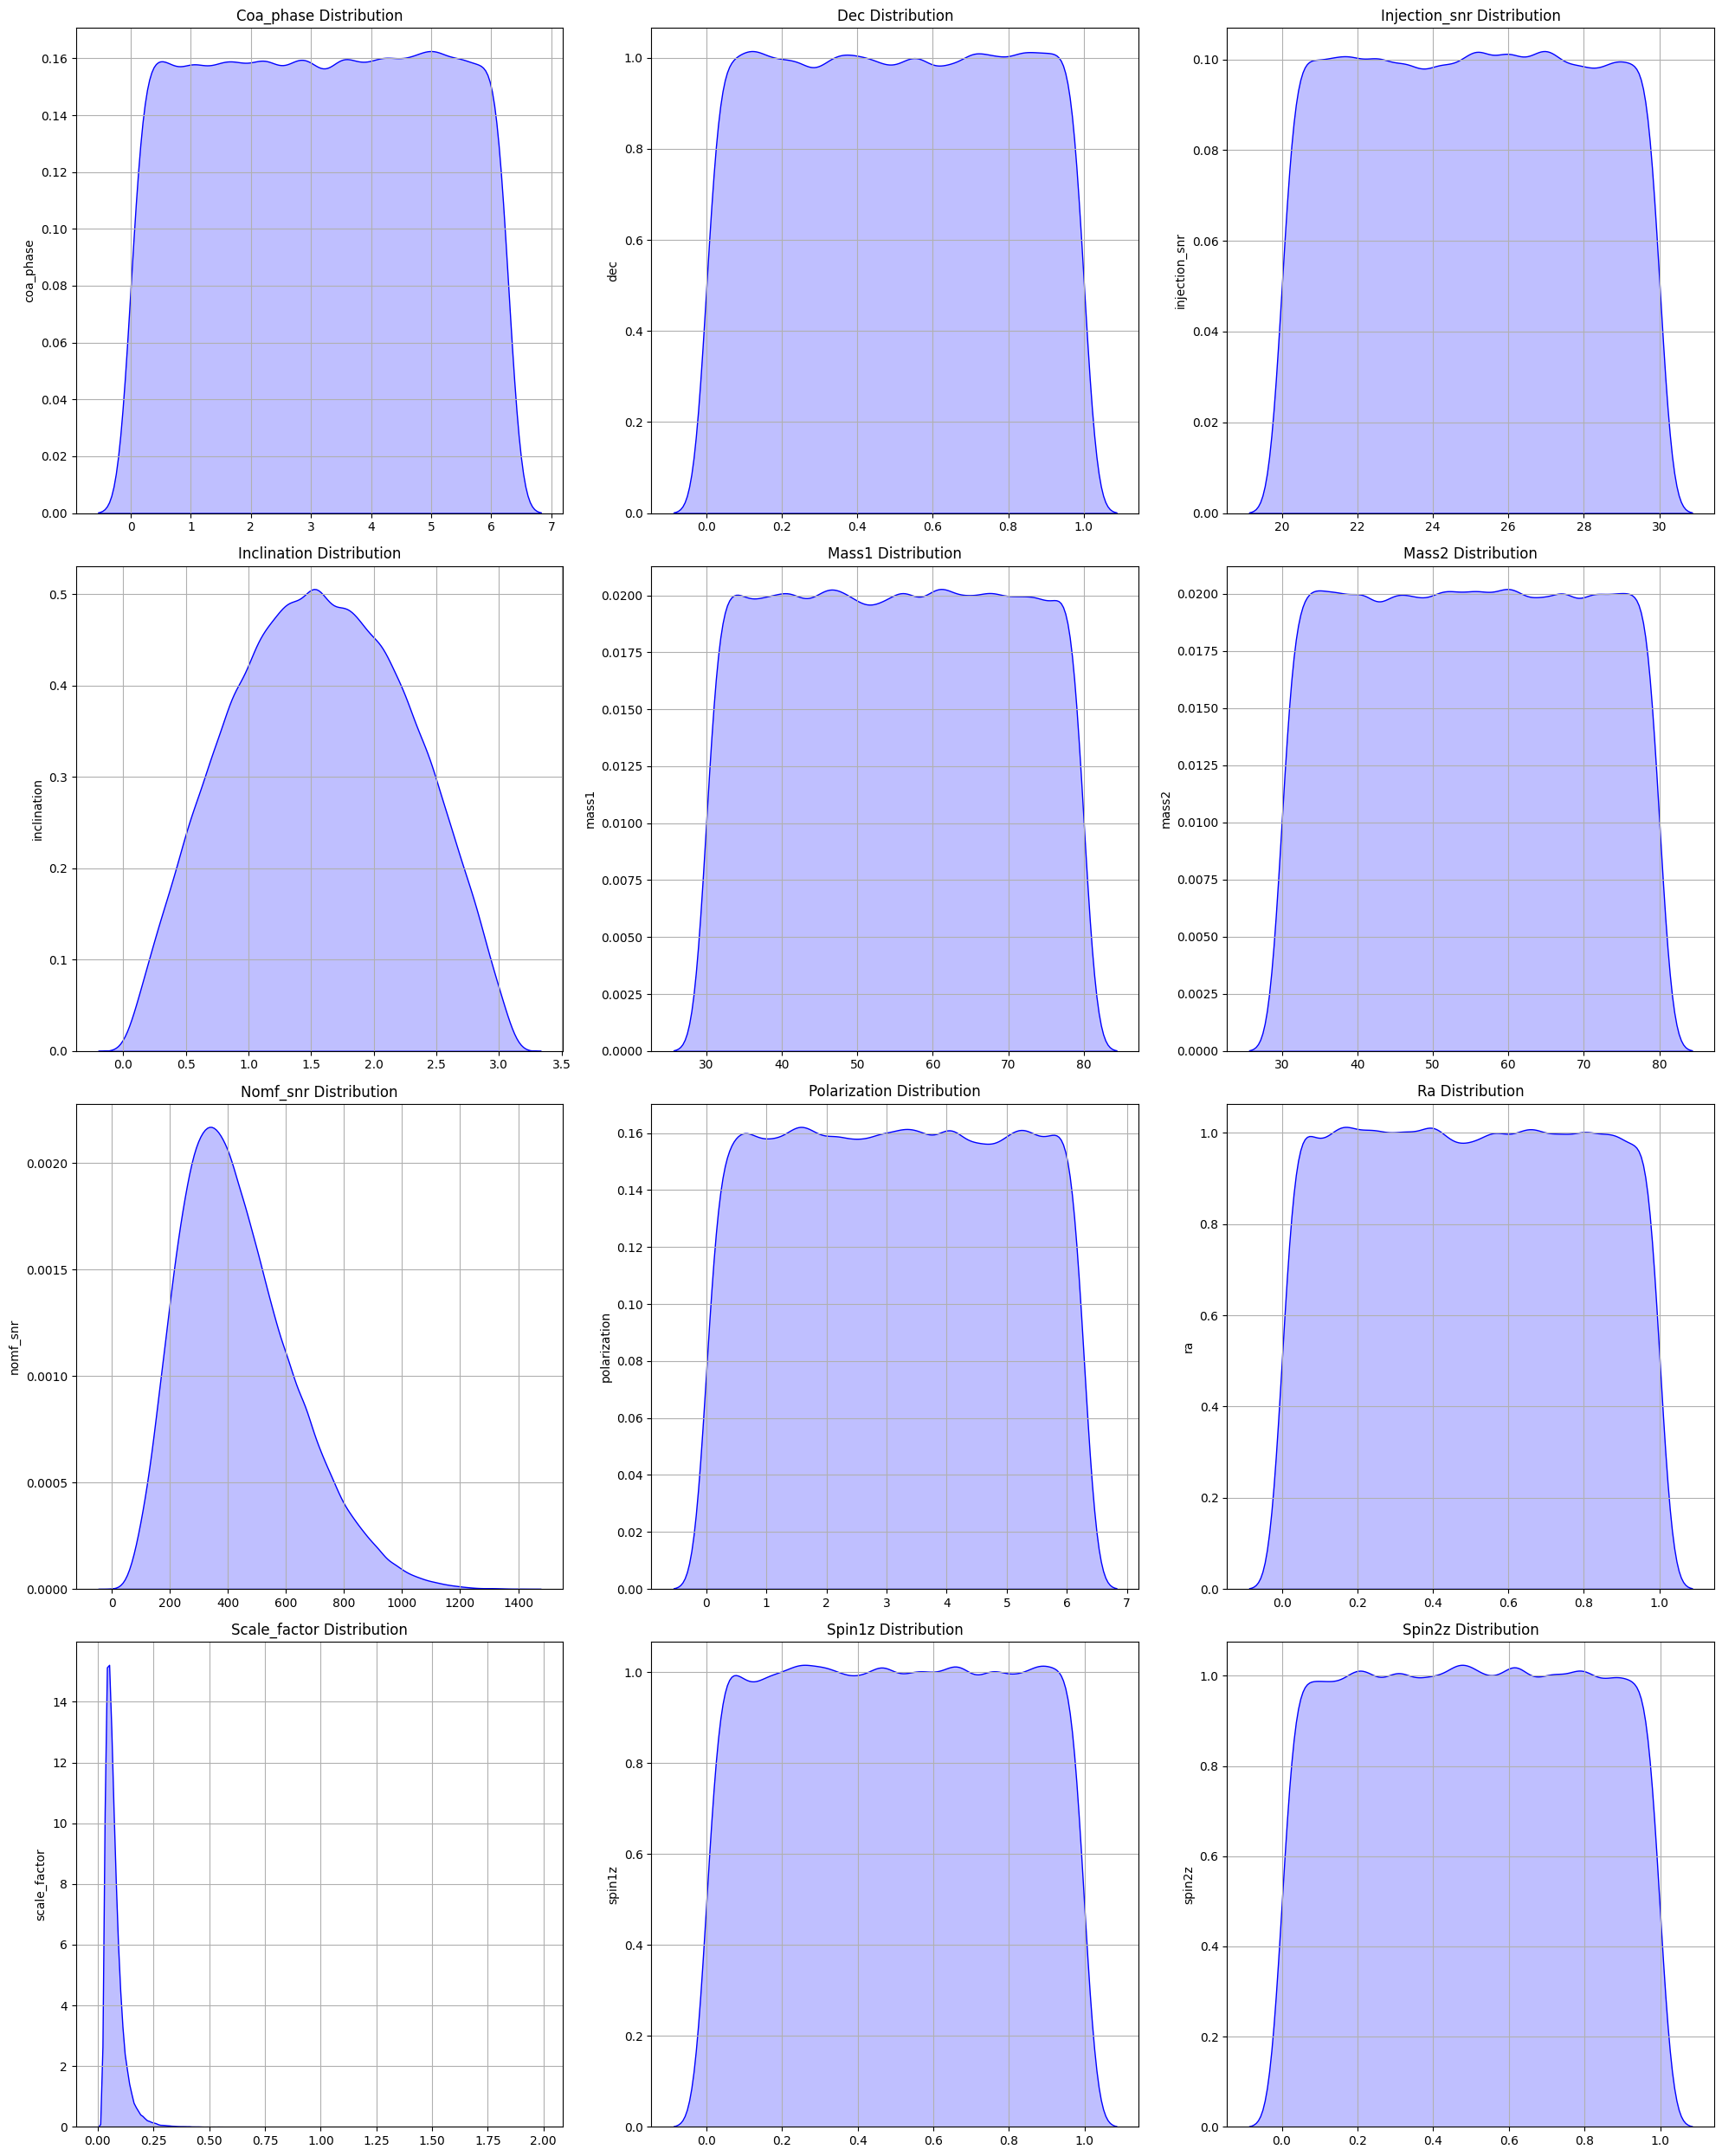

In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") 

# Define the file path
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'

# Function to plot density plots of parameters
def plot_density_plots(file_path):
    with h5py.File(file_path, 'r') as file:
        parameters = ['coa_phase', 'dec', 'injection_snr', 'inclination', 'mass1', 'mass2', 'nomf_snr', 'polarization', 'ra', 'scale_factor', 'spin1z', 'spin2z']
        
        # Set up the figure and axes
        fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
        
        # Flatten the array of axes for easier iteration
        axs = axs.flatten()
        
        for i, parameter in enumerate(parameters):
            data = file[f"injection_parameters/{parameter}"][:]
            
            # Plot using Seaborn
            sns.kdeplot(data, ax=axs[i], fill=True, color='blue')
            
            axs[i].set_title(f"{parameter.capitalize()} Distribution")
            axs[i].set_ylabel(parameter)
            axs[i].grid(True)
        
        # Remove any unused subplots
        for j in range(len(parameters), len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()

# Plot density plots of parameters using Seaborn
plot_density_plots(file_path)

In [12]:
# Based on the graphs above, the data is generally uniformly distributed. This is especially important for parameters 
# such as mass1 and mass2, as it means that our model has a relatively wide range of data to work with. This can help reduce
# the level of bias present in the model allowing it to be more generalisable to unseen data.

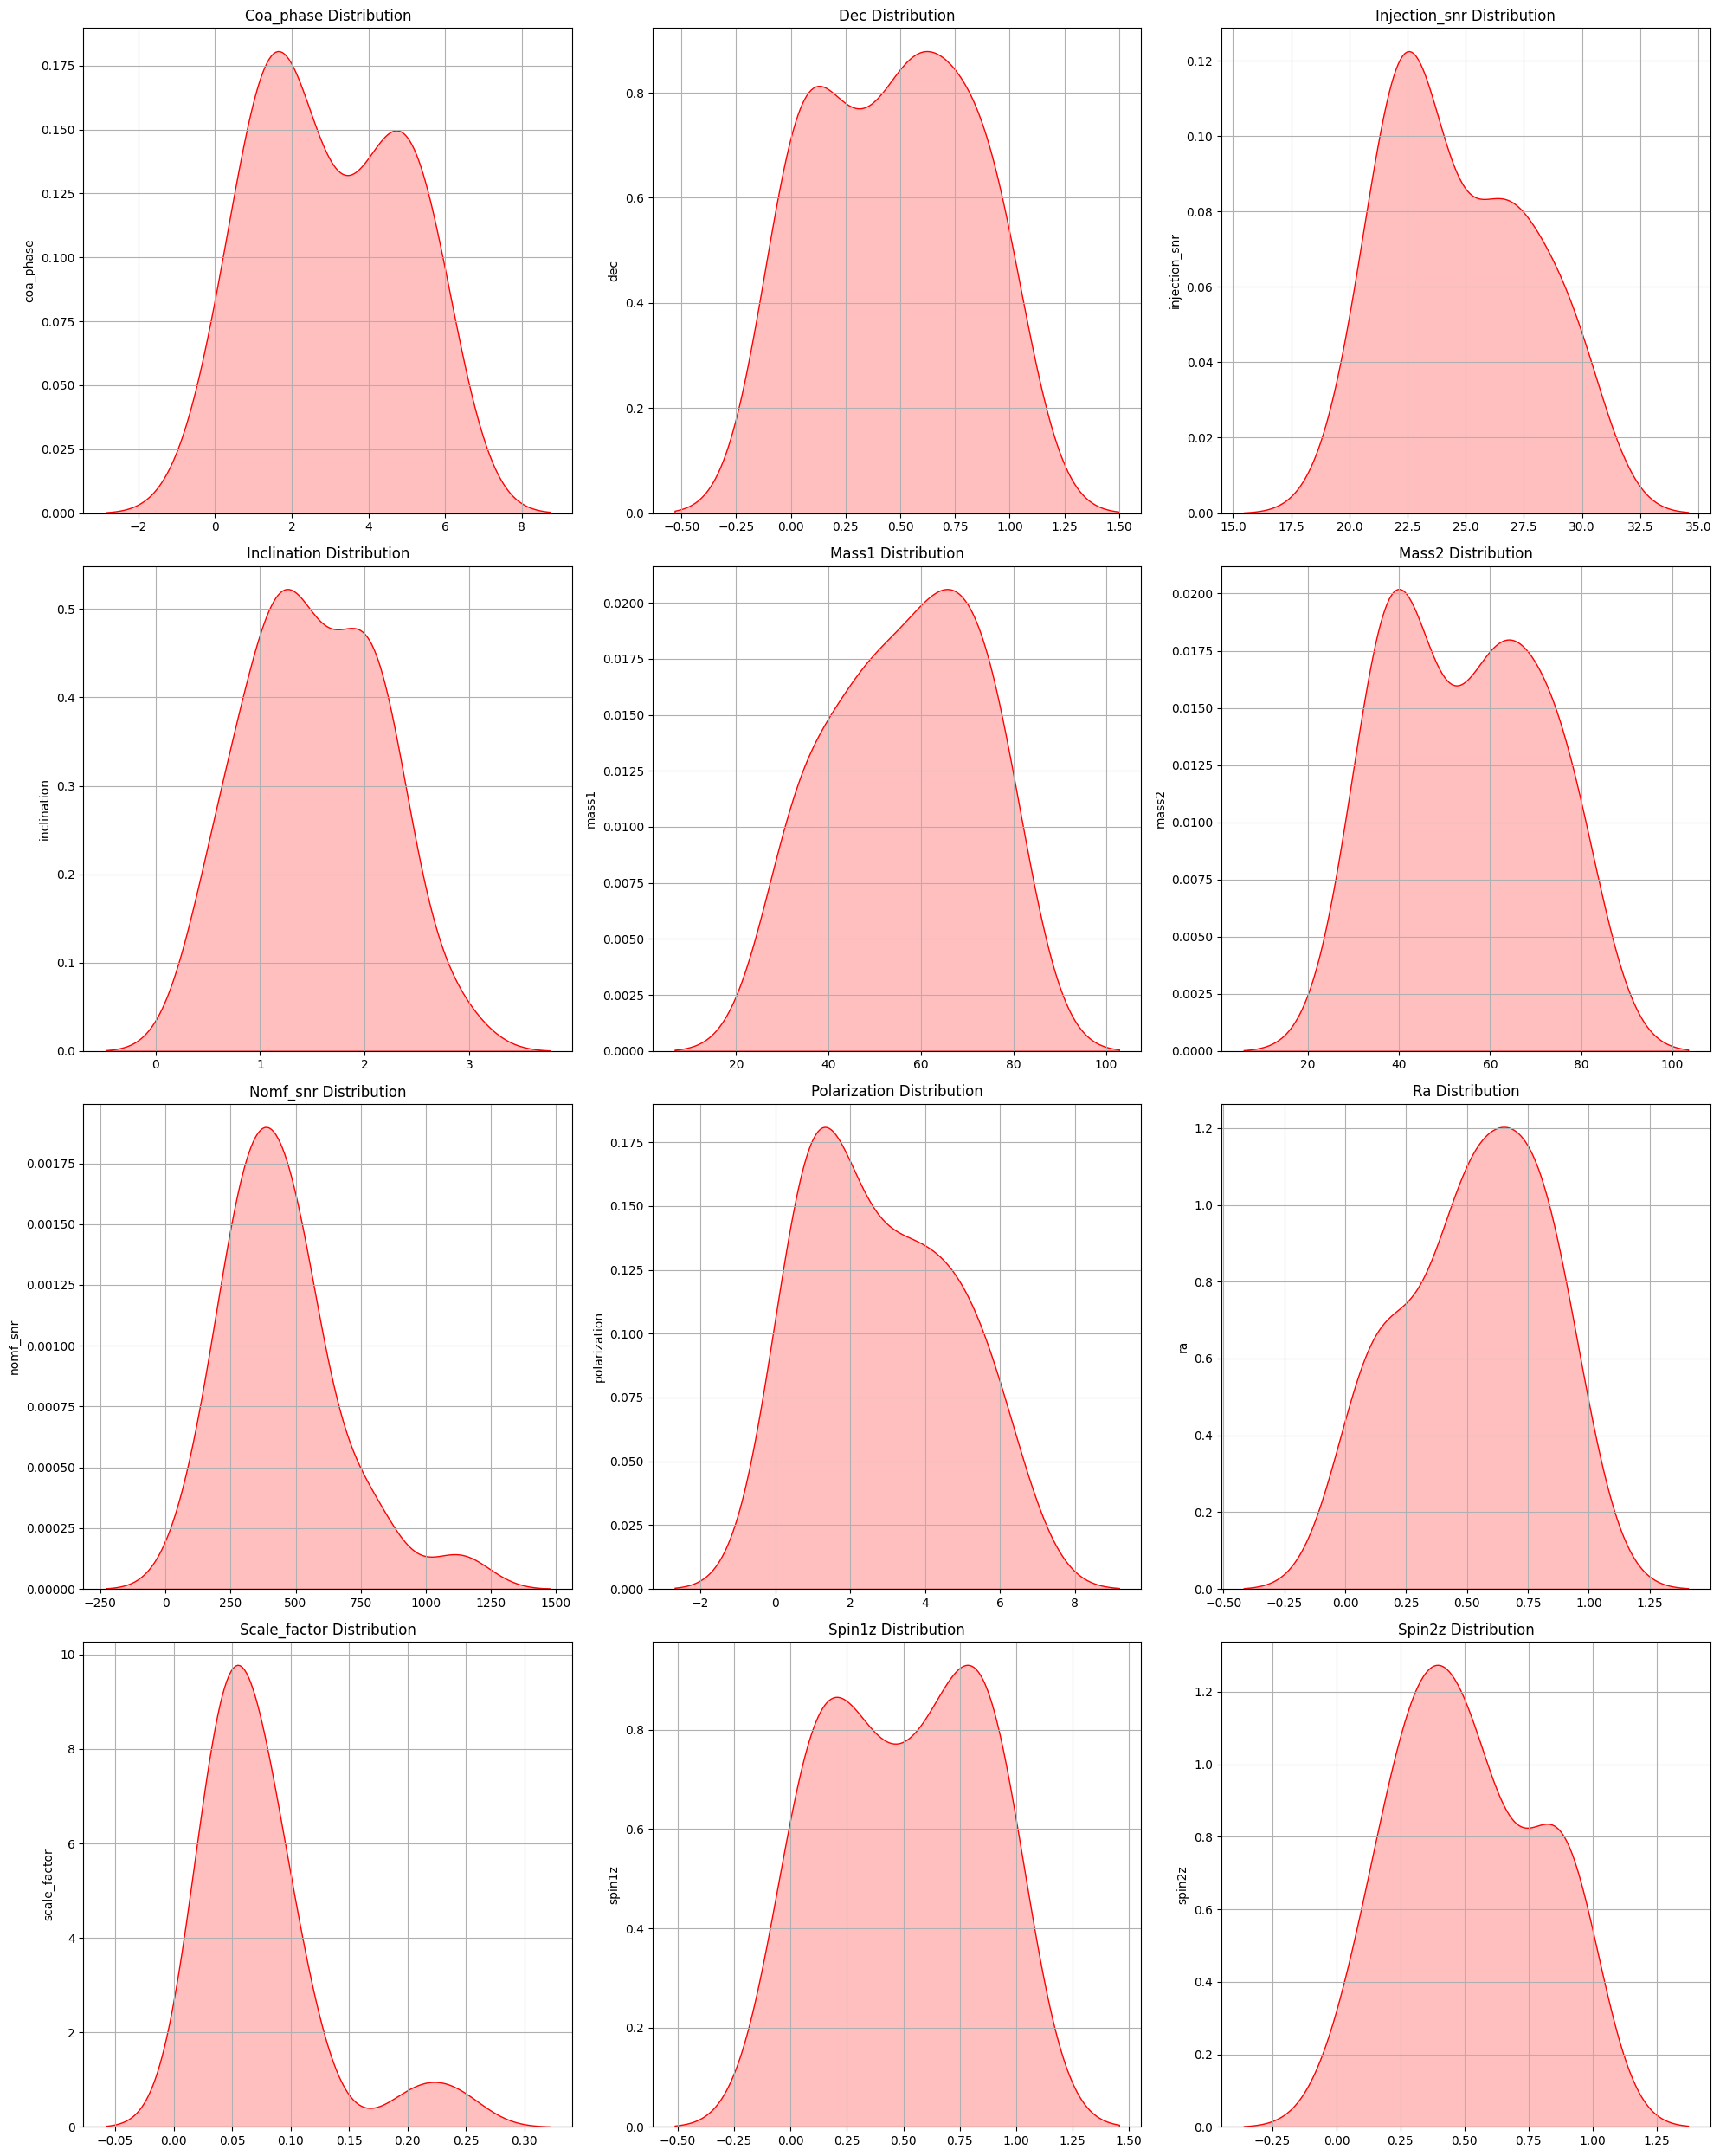

In [13]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") 

# Define the file path
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

# Function to plot density plots of parameters
def plot_density_plots(file_path):
    with h5py.File(file_path, 'r') as file:
        parameters = ['coa_phase', 'dec', 'injection_snr', 'inclination', 'mass1', 'mass2', 'nomf_snr', 'polarization', 'ra', 'scale_factor', 'spin1z', 'spin2z']
        
        # Set up the figure and axes
        fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
        
        # Flatten the array of axes for easier iteration
        axs = axs.flatten()
        
        for i, parameter in enumerate(parameters):
            data = file[f"injection_parameters/{parameter}"][:]
            
            # Plot using Seaborn
            sns.kdeplot(data, ax=axs[i], fill=True, color='red')
            
            axs[i].set_title(f"{parameter.capitalize()} Distribution")
            axs[i].set_ylabel(parameter)
            axs[i].grid(True)
        
        # Remove any unused subplots
        for j in range(len(parameters), len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()

# Plot density plots of parameters using Seaborn
plot_density_plots(file_path)

In [14]:
# The test data contains significantly fewer samples (25 samples per strain and signal) which means there is a higher
# level of variability amongst the data. This will be a good test to see if the model can handle the variations in unseen data

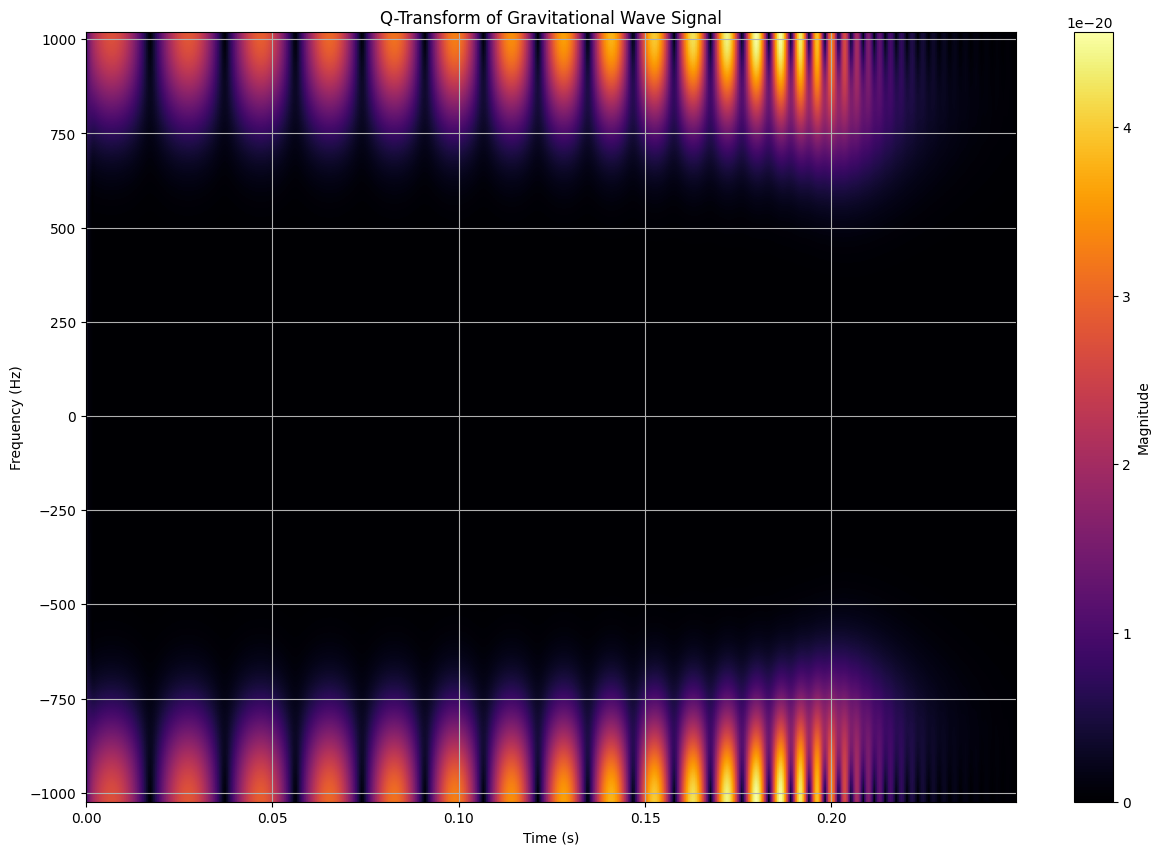

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.fft import fft, fftfreq

def q_transform(signal, sampling_rate, Q=1.0):
    N = len(signal)
    T = 1.0 / sampling_rate
    x = np.arange(0, N) * T
    freqs = fftfreq(N, T)
    
    # Initialize the Q-transform matrix
    Q_transform = np.zeros((N, N), dtype=complex)
    
    # Compute the Q-transform
    for i in range(N):
        window = np.exp(-0.5 * ((x - x[i]) / (Q * T))**2)
        windowed_signal = signal * window
        Q_transform[:, i] = fft(windowed_signal)
    
    return Q_transform, freqs, x

def plot_q_transform(signal, sampling_rate, Q=1.0):

    Q_transform, freqs, times = q_transform(signal, sampling_rate, Q)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(np.abs(Q_transform), aspect='auto', extent=[times.min(), times.max(), freqs.min(), freqs.max()], cmap='inferno')
    plt.title('Q-Transform of Gravitational Wave Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Magnitude')
    plt.grid(True)
    plt.show()

# Example usage
import h5py

# Load data
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
with h5py.File(file_path, 'r') as file:
    h1_signal = file['injection_parameters/h1_signal'][0] 
    sampling_rate = 2048 

# Plot Q-transform
plot_q_transform(h1_signal, sampling_rate, Q=2.0)

In [16]:
# In the above example, the Q-transform plot shows how the frequency content of the gravitational wave evlolves over time
# This type of plot is particulary useful at detecting chirp signals (produced by binary black hole mergers) which are short in
# duration but exhibit a distinct frequency increase over time. The plot shows a rising frequency as time progresses.

# Model Prototyping

## Dense-LSTM Test Model v1

In [ ]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define the file path
file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'

# Function to load pure waveform data
def load_pure_waveform_data(file_path, detector):
    with h5py.File(file_path, 'r') as file:
        waveform_data = file[f'injection_parameters/{detector}_signal'][:]  
    return waveform_data

# Load pure waveform data for H1, L1, and V1 detectors
h1_waveform = load_pure_waveform_data(file_path, 'h1')
l1_waveform = load_pure_waveform_data(file_path, 'l1')
v1_waveform = load_pure_waveform_data(file_path, 'v1')

# Combine waveform data from all detectors (stacking them along a new dimension)
waveform_data = np.stack([h1_waveform, l1_waveform, v1_waveform], axis=-1)

# Reshape data to fit LSTM input requirements
n_samples, n_timesteps, n_features = waveform_data.shape

# Split data into training and test sets
X_train, X_test = train_test_split(waveform_data, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, n_features)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, n_features)).reshape(X_test.shape)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, X_train[:, -1, 0], epochs=3, batch_size=32, validation_data=(X_test, X_test[:, -1, 0]))

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# The above code is a prototype of the Dense-LSTM model with basic data normalisation.

## Dense-LSTM Test Model v2

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, Dense, TimeDistributed

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

# Function to load data
def load_pure_waveform_data(file_path, detector):
    with h5py.File(file_path, 'r') as file:
        waveform_data = file[f'injection_parameters/{detector}_signal'][:]
    return waveform_data

# Load and normalize data for training
h1_waveform_train = load_pure_waveform_data(train_file_path, 'h1')
l1_waveform_train = load_pure_waveform_data(train_file_path, 'l1')
v1_waveform_train = load_pure_waveform_data(train_file_path, 'v1')
waveform_data_train = np.stack([h1_waveform_train, l1_waveform_train, v1_waveform_train], axis=-1)
scaler_train = MinMaxScaler(feature_range=(-1, 1))
waveform_data_normalized_train = scaler_train.fit_transform(waveform_data_train.reshape(-1, 3)).reshape(waveform_data_train.shape)

# Load and normalize data for testing
h1_waveform_test = load_pure_waveform_data(test_file_path, 'h1')
l1_waveform_test = load_pure_waveform_data(test_file_path, 'l1')
v1_waveform_test = load_pure_waveform_data(test_file_path, 'v1')
waveform_data_test = np.stack([h1_waveform_test, l1_waveform_test, v1_waveform_test], axis=-1)
scaler_test = MinMaxScaler(feature_range=(-1, 1))
waveform_data_normalized_test = scaler_test.fit_transform(waveform_data_test.reshape(-1, 3)).reshape(waveform_data_test.shape)

# Reshaping into 516 overlapping sub-sequences
def reshape_to_subsequences(data, subsequence_length):
    n_samples, n_timesteps, n_features = data.shape
    padded_data = np.pad(data, ((0, 0), (subsequence_length - 1, subsequence_length - 1), (0, 0)), mode='constant')
    n_subsequences = n_timesteps + subsequence_length - 1
    subsequences = np.zeros((n_samples, n_subsequences, subsequence_length, n_features))
    for i in range(n_subsequences):
        subsequences[:, i, :, :] = padded_data[:, i:i+subsequence_length, :]
    return subsequences

subsequence_length = 4
X_train_subsequences = reshape_to_subsequences(waveform_data_normalized_train, subsequence_length)
X_test_subsequences = reshape_to_subsequences(waveform_data_normalized_test, subsequence_length)

# Adjust target data to match the output shape of the model (516 timesteps)
def adjust_target_data(target_data, subsequence_length):
    n_samples, n_timesteps, n_features = target_data.shape
    adjusted_target = np.pad(target_data, ((0, 0), (subsequence_length - 1, subsequence_length - 1), (0, 0)), mode='constant')
    return adjusted_target[:, :n_timesteps + subsequence_length - 1, 0]

y_train = adjust_target_data(waveform_data_normalized_train, subsequence_length)
y_test = adjust_target_data(waveform_data_normalized_test, subsequence_length)

# Define the CNN-LSTM model
model = Sequential()
model.add(TimeDistributed(Conv1D(32, 1, activation='tanh', padding='same'), input_shape=(516, 4, 3)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(16, 1, activation='tanh', padding='same')))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_subsequences, y_train, epochs=3, batch_size=32, validation_data=(X_test_subsequences, y_test))

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# In V2, we used 516 overlapping subsequences which followed the method used by Chatterjee et al. (2021). Additionally, we
# introduced the test data and adjusted the data handling to ensure the testing data is handled in isolation.

## Dense-LSTM Test Model v3

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

# Function to load data
def load_pure_waveform_data(file_path, detector):
    with h5py.File(file_path, 'r') as file:
        waveform_data = file[f'injection_parameters/{detector}_signal'][:]
    return waveform_data

# Load and normalize data
def normalize_waveform_data(data, scaler=None):
    if scaler is None:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        reshaped_data = data.reshape(-1, 3)
        normalized_data = scaler.fit_transform(reshaped_data).reshape(data.shape)
    else:
        reshaped_data = data.reshape(-1, 3)
        normalized_data = scaler.transform(reshaped_data).reshape(data.shape)
    return normalized_data, scaler

# Function to reshape data into overlapping sub-sequences
def reshape_to_subsequences(data, subsequence_length):
    n_samples, n_timesteps, n_features = data.shape
    padded_data = np.pad(data, ((0, 0), (subsequence_length - 1, subsequence_length - 1), (0, 0)), mode='constant')
    n_subsequences = n_timesteps + subsequence_length - 1
    subsequences = np.zeros((n_samples, n_subsequences, subsequence_length, n_features))
    for i in range(n_subsequences):
        subsequences[:, i, :, :] = padded_data[:, i:i+subsequence_length, :]
    return subsequences

# Function to adjust target data to match the output shape of the model
def adjust_target_data(target_data, subsequence_length):
    n_samples, n_timesteps, n_features = target_data.shape
    adjusted_target = np.pad(target_data, ((0, 0), (subsequence_length - 1, subsequence_length - 1), (0, 0)), mode='constant')
    return adjusted_target[:, :n_timesteps + subsequence_length - 1, 0]

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 1, figsize=(12, 2*num_samples))
    
    for i in range(num_samples):
        axs[i].plot(predictions[i], label='Predicted', alpha=0.7)
        axs[i].plot(y_test[i], label='Actual', alpha=0.7)
        axs[i].legend()
        axs[i].set_title(f'Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  
    return loss_function

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_waveform_train = load_pure_waveform_data(train_file_path, 'h1')
    l1_waveform_train = load_pure_waveform_data(train_file_path, 'l1')
    v1_waveform_train = load_pure_waveform_data(train_file_path, 'v1')
    waveform_data_train = np.stack([h1_waveform_train, l1_waveform_train, v1_waveform_train], axis=-1)
    waveform_data_normalized_train, scaler_train = normalize_waveform_data(waveform_data_train)
    
    # Model input preparation
    X_train_subsequences = reshape_to_subsequences(waveform_data_normalized_train, subsequence_length)
    y_train = adjust_target_data(waveform_data_normalized_train, subsequence_length)

    # Model definition
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 1, activation='tanh', padding='same'), input_shape=(516, 4, 3)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Conv1D(16, 1, activation='tanh', padding='same')))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(TimeDistributed(Dense(1)))
    
    # Compile the model with custom loss function
    model.compile(optimizer='adam', loss=custom_loss(0))

    # Train the model
    history = model.fit(X_train_subsequences, y_train, epochs=epochs_per_d, batch_size=32,
                        validation_split=0.2, callbacks=[LearningRateScheduler(lr_schedule)])

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model, scaler_train

# Constants and parameters
subsequence_length = 4
epochs_per_d = 1

# Execute the training process
trained_model, scaler_train = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path, scaler_train):
    h1_waveform_test = load_pure_waveform_data(test_file_path, 'h1')
    l1_waveform_test = load_pure_waveform_data(test_file_path, 'l1')
    v1_waveform_test = load_pure_waveform_data(test_file_path, 'v1')
    waveform_data_test = np.stack([h1_waveform_test, l1_waveform_test, v1_waveform_test], axis=-1)
    
    
    # Normalize testing data using the scaler from training
    waveform_data_normalized_test, _ = normalize_waveform_data(waveform_data_test, scaler_train)
    X_test_subsequences = reshape_to_subsequences(waveform_data_normalized_test, subsequence_length)
    y_test = adjust_target_data(waveform_data_normalized_test, subsequence_length)
    
    
    # Plot predictions vs actual waveforms on test set
    plot_predictions(trained_model, X_test_subsequences, y_test)
    
    # Evaluate on test set
    y_test_pred = trained_model.predict(X_test_subsequences)
    overlap_test, snr_test = compute_metrics(y_test.flatten(), y_test_pred.flatten())
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path, scaler_train)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, Dense, TimeDistributed
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

# Function to load data
def load_pure_waveform_data(file_path, detector):
    with h5py.File(file_path, 'r') as file:
        waveform_data = file[f'injection_parameters/{detector}_signal'][:]
    return waveform_data

# Load and normalize data
def normalize_waveform_data(data, scaler=None):
    if scaler is None:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        reshaped_data = data.reshape(-1, 3)
        normalized_data = scaler.fit_transform(reshaped_data).reshape(data.shape)
    else:
        reshaped_data = data.reshape(-1, 3)
        normalized_data = scaler.transform(reshaped_data).reshape(data.shape)
    return normalized_data, scaler

def reshape_to_subsequences(data, subsequence_length):
    n_samples, n_timesteps, n_features = data.shape
    n_subsequences = n_timesteps - subsequence_length + 1
    subsequences = np.zeros((n_samples, n_subsequences, subsequence_length, n_features))
    for i in range(n_subsequences):
        subsequences[:, i, :, :] = data[:, i:i+subsequence_length, :]
    return subsequences

def adjust_target_data(target_data, subsequence_length):
    n_samples, n_timesteps, n_features = target_data.shape
    n_subsequences = n_timesteps - subsequence_length + 1
    adjusted_target = np.zeros((n_samples, n_subsequences, 1))
    for i in range(n_subsequences):
        adjusted_target[:, i, 0] = target_data[:, i + subsequence_length - 1, 0]
    return adjusted_target

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 1, figsize=(12, 2*num_samples))
    
    for i in range(num_samples):
        axs[i].plot(predictions[i], label='Predicted', alpha=0.7)
        axs[i].plot(y_test[i], label='Actual', alpha=0.7)
        axs[i].legend()
        axs[i].set_title(f'Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_waveform_train = load_pure_waveform_data(train_file_path, 'h1')
    l1_waveform_train = load_pure_waveform_data(train_file_path, 'l1')
    v1_waveform_train = load_pure_waveform_data(train_file_path, 'v1')
    waveform_data_train = np.stack([h1_waveform_train, l1_waveform_train, v1_waveform_train], axis=-1)
    waveform_data_normalized_train, scaler_train = normalize_waveform_data(waveform_data_train)
    
    # Model input preparation
    X_train_subsequences = reshape_to_subsequences(waveform_data_normalized_train, subsequence_length)
    y_train = adjust_target_data(waveform_data_normalized_train, subsequence_length)

    # Model definition
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 1, activation='tanh', padding='same'), input_shape=(None, subsequence_length, 3)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Conv1D(16, 1, activation='tanh', padding='same')))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(TimeDistributed(Dense(1)))
    
    # Compile the model with custom loss function
    model.compile(optimizer='adam', loss=custom_loss(0))

    # Train the model
    history = model.fit(X_train_subsequences, y_train, epochs=epochs_per_d, batch_size=32,
                        validation_split=0.2, callbacks=[LearningRateScheduler(lr_schedule)])

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model, scaler_train

# Constants and parameters
subsequence_length = 4
epochs_per_d = 1

# Execute the training process
trained_model, scaler_train = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path, scaler_train):
    h1_waveform_test = load_pure_waveform_data(test_file_path, 'h1')
    l1_waveform_test = load_pure_waveform_data(test_file_path, 'l1')
    v1_waveform_test = load_pure_waveform_data(test_file_path, 'v1')
    waveform_data_test = np.stack([h1_waveform_test, l1_waveform_test, v1_waveform_test], axis=-1)
    
    # Normalize testing data using the scaler from training
    waveform_data_normalized_test, _ = normalize_waveform_data(waveform_data_test, scaler_train)
    X_test_subsequences = reshape_to_subsequences(waveform_data_normalized_test, subsequence_length)
    y_test = adjust_target_data(waveform_data_normalized_test, subsequence_length)
    
    # Plot predictions vs actual waveforms on test set
    plot_predictions(trained_model, X_test_subsequences, y_test)
    
    # Evaluate on test set
    y_test_pred = trained_model.predict(X_test_subsequences)
    overlap_test, snr_test = compute_metrics(y_test.flatten(), y_test_pred.flatten())
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path, scaler_train)

In [ ]:
# The above models introduced a learning rate scheduler alongside a custom loss function used by Chatterjee et al. (2021).
# However, the model was achieving an unusually high overlap score of 1 which suggested that the predictions were perfectly
# accurate. Printing out the samples helped us understand that the actual waveforms were incorrectly morphed into a straight 
# line of -1.00, which explains why the accuracy was so high.

### Subsequence Debugging

In [ ]:
import matplotlib.pyplot as plt

# Constants and parameters
subsequence_length = 4

# Load training data for H1 only
h1_waveform_train = load_pure_waveform_data(train_file_path, 'h1')

# Normalize data for H1 only
waveform_data_train = h1_waveform_train[:, :, np.newaxis]  # Add a new axis to match shape requirements
waveform_data_normalized_train, scaler_train = normalize_waveform_data(waveform_data_train)

# Model input preparation
X_train_subsequences = reshape_to_subsequences(waveform_data_normalized_train, subsequence_length)
y_train = adjust_target_data(waveform_data_normalized_train, subsequence_length)

# Plot the original waveform data for H1 only
plt.figure(figsize=(12, 6))
plt.plot(waveform_data_train[0, :, 0], label='Original H1')
plt.title('Original Waveform Data')
plt.legend()
plt.show()

# Plot reshaped subsequences for the first sample
plt.figure(figsize=(12, 6))
for i in range(subsequence_length):
    plt.plot(X_train_subsequences[0, :, i, 0], label=f'Subsequence {i+1}')
plt.title('Reshaped Subsequences (H1)')
plt.legend()
plt.show()

# Plot adjusted target data for the first sample
plt.figure(figsize=(12, 6))
plt.plot(y_train[0, :, 0], label='Adjusted Target H1')
plt.title('Adjusted Target Data')
plt.legend()
plt.show()


In [ ]:
# Plotting the original waveforms, reshaped subsequences, and target data allowed us to verify that no additional reshaping 
# was necessary. Only the strain data needed to be normalised between values -1 to 1 to match the corresponding
# GW signal data. 

# Final Models

### Dense-LSTM Model (H1)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
    
    # Rescale h1_strain and h1_signal to be between -1 and 1
    h1_strain_scaled = (h1_strain - h1_strain.min()) / (h1_strain.max() - h1_strain.min()) * 2 - 1
    h1_signal_scaled = (h1_signal - h1_signal.min()) / (h1_signal.max() - h1_signal.min()) * 2 - 1
    
    return h1_strain_scaled, h1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 1, figsize=(12, 2*num_samples))
    
    for i in range(num_samples):
        axs[i].plot(predictions[i], label='Predicted', alpha=0.7)
        axs[i].plot(y_test[i], label='Actual', alpha=0.7)
        axs[i].legend()
        axs[i].set_title(f'Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Constants and parameters
epochs_per_d = 5

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train = load_pure_waveform_data(train_file_path)

    # Model input preparation
    X_train = h1_strain_train
    y_train = h1_signal_train

    # Model definition
    model = Sequential()
    model.add(Conv1D(32, 1, activation='tanh', padding='same', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(16, 1, activation='tanh', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Flatten())
    model.add(Dense(512))
    
    # Compile the model with custom loss function
    model.compile(optimizer='adam', loss=custom_loss(0))

    # Train the model
    history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=epochs_per_d, batch_size=32,
                        validation_split=0.2, callbacks=[LearningRateScheduler(lr_schedule)])

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test = load_pure_waveform_data(test_file_path)
    
    X_test = h1_strain_test
    y_test = h1_signal_test
    
    # Plot predictions vs actual waveforms on test set
    plot_predictions(trained_model, X_test.reshape(-1, X_test.shape[1], 1), y_test)
    
    # Evaluate on test set
    y_test_pred = trained_model.predict(X_test.reshape(-1, X_test.shape[1], 1))
    overlap_test, snr_test = compute_metrics(y_test.flatten(), y_test_pred.flatten())
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
    
    # Rescale h1_strain and h1_signal to be between -1 and 1
    h1_strain_scaled = (h1_strain - h1_strain.min()) / (h1_strain.max() - h1_strain.min()) * 2 - 1
    h1_signal_scaled = (h1_signal - h1_signal.min()) / (h1_signal.max() - h1_signal.min()) * 2 - 1
    
    return h1_strain_scaled, h1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 1, figsize=(12, 2*num_samples))
    
    for i in range(num_samples):
        axs[i].plot(predictions[i], label='Predicted', alpha=0.7)
        axs[i].plot(y_test[i], label='Actual', alpha=0.7)
        axs[i].legend()
        axs[i].set_title(f'Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Constants and parameters
epochs_per_d = 10

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train = load_pure_waveform_data(train_file_path)

    # Model input preparation
    X_train = h1_strain_train
    y_train = h1_signal_train

    # Model definition
    model = Sequential()
    model.add(Conv1D(32, 1, activation='tanh', padding='same', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(16, 1, activation='tanh', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Bidirectional(LSTM(100, return_sequences=True, activation='tanh')))
    model.add(Flatten())
    model.add(Dense(512))
    
    # Compile the model with custom loss function
    model.compile(optimizer='adam', loss=custom_loss(0))

    # Train the model
    history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=epochs_per_d, batch_size=32,
                        validation_split=0.2, callbacks=[LearningRateScheduler(lr_schedule)])

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test = load_pure_waveform_data(test_file_path)
    
    X_test = h1_strain_test
    y_test = h1_signal_test
    
    # Plot predictions vs actual waveforms on test set
    plot_predictions(trained_model, X_test.reshape(-1, X_test.shape[1], 1), y_test)
    
    # Evaluate on test set
    y_test_pred = trained_model.predict(X_test.reshape(-1, X_test.shape[1], 1))
    overlap_test, snr_test = compute_metrics(y_test.flatten(), y_test_pred.flatten())
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

## Dense-LSTM Model (Final)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

# Constants
TRAIN_FILE_PATH = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
TEST_FILE_PATH = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'
EPOCHS_PER_D = 1
BATCH_SIZE = 32

def load_pure_waveform_data(file_path: str) -> tuple:
    """Load pure waveform data from HDF file"""
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    return h1_strain, h1_signal, l1_strain, l1_signal, v1_strain, v1_signal

def rescale_data(data: np.ndarray) -> np.ndarray:
    """Rescale data to be between -1 and 1"""
    return (data - data.min()) / (data.max() - data.min()) * 2 - 1

def build_and_compile_model(input_shape: tuple, custom_loss_fn) -> Model:
    """Build and compile the model"""
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define shared layers
    def create_branch(input_layer):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Bidirectional(LSTM(100, return_sequences=True, activation='tanh'))(x)
        x = Bidirectional(LSTM(100, return_sequences=True, activation='tanh'))(x)
        x = Bidirectional(LSTM(100, return_sequences=True, activation='tanh'))(x)
        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output
    
    output_h1 = create_branch(input_h1)
    output_l1 = create_branch(input_l1)
    output_v1 = create_branch(input_v1)
    
    # Create model
    model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model.compile(optimizer='adam', loss=custom_loss_fn)
    return model

def train_model(train_file_path: str, test_file_path: str) -> Model:
    """Train the model"""
    # Load training data
    h1_strain, h1_signal, l1_strain, l1_signal, v1_strain, v1_signal = load_pure_waveform_data(train_file_path)
    
    # Rescale data
    h1_strain = rescale_data(h1_strain)
    h1_signal = rescale_data(h1_signal)
    l1_strain = rescale_data(l1_strain)
    l1_signal = rescale_data(l1_signal)
    v1_strain = rescale_data(v1_strain)
    v1_signal = rescale_data(v1_signal)
    
    # Define input shape
    input_shape = (h1_strain.shape[1], 1)
    
    # Build and compile model
    model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model.fit([h1_strain.reshape(-1, h1_strain.shape[1], 1),
                         l1_strain.reshape(-1, l1_strain.shape[1], 1),
                         v1_strain.reshape(-1, v1_strain.shape[1], 1)],
                        [h1_signal.reshape(-1, 512, 1),
                         l1_signal.reshape(-1, 512, 1),
                         v1_signal.reshape(-1, 512, 1)],
                        epochs=epochs_per_d, batch_size=BATCH_SIZE, validation_split=0.2,
                        callbacks=[LearningRateScheduler(lr_schedule)])

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

def evaluate_model(trained_model: Model, test_file_path: str):
    """Evaluate the trained model"""
    h1_strain, h1_signal, l1_strain, l1_signal, v1_strain, v1_signal = load_pure_waveform_data(test_file_path)
    
    # Rescale data
    h1_strain = rescale_data(h1_strain)
    h1_signal = rescale_data(h1_signal)
    l1_strain = rescale_data(l1_strain)
    l1_signal = rescale_data(l1_signal)
    v1_strain = rescale_data(v1_strain)
    v1_signal = rescale_data(v1_signal)
    
    # Evaluate the model
    plot_predictions(trained_model, 
                     [h1_strain.reshape(-1, h1_strain.shape[1], 1),
                      l1_strain.reshape(-1, l1_strain.shape[1], 1),
                      v1_strain.reshape(-1, v1_strain.shape[1], 1)], 
                     [h1_signal.reshape(-1, 512, 1),
                      l1_signal.reshape(-1, 512, 1),
                      v1_signal.reshape(-1, 512, 1)])
    
    # Compute metrics
    y_test_pred = trained_model.predict([h1_strain.reshape(-1, h1_strain.shape[1], 1),
                                         l1_strain.reshape(-1, l1_strain.shape[1], 1),
                                         v1_strain.reshape(-1, v1_strain.shape[1], 1)])
    overlap_test_h1, snr_test_h1 = compute_metrics(h1_signal, y_test_pred[0])
    overlap_test_l1, snr_test_l1 = compute_metrics(l1_signal, y_test_pred[1])
    overlap_test_v1, snr_test_v1 = compute_metrics(v1_signal, y_test_pred[2])
    
    print(f'Test Set - H1 Overlap: {overlap_test_h1:.4f}, SNR: {snr_test_h1:.4f}')
    print(f'Test Set - L1 Overlap: {overlap_test_l1:.4f}, SNR: {snr_test_l1:.4f}')
    print(f'Test Set - V1 Overlap: {overlap_test_v1:.4f}, SNR: {snr_test_v1:.4f}')

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

### xLSTM Model (H1)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Layer
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
    
    # Rescale h1_strain and h1_signal to be between -1 and 1
    h1_strain_scaled = (h1_strain - h1_strain.min()) / (h1_strain.max() - h1_strain.min()) * 2 - 1
    h1_signal_scaled = (h1_signal - h1_signal.min()) / (h1_signal.max() - h1_signal.min()) * 2 - 1
    
    return h1_strain_scaled, h1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 1, figsize=(12, 2*num_samples))
    
    for i in range(num_samples):
        axs[i].plot(predictions[i], label='Predicted', alpha=0.7)
        axs[i].plot(y_test[i], label='Actual', alpha=0.7)
        axs[i].legend()
        axs[i].set_title(f'Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Define the xLSTM block
class xLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(xLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv1 = Conv1D(self.units, 1, padding='same', activation='relu')
        self.conv2 = Conv1D(input_shape[-1], 1, padding='same')  # Ensure output shape matches input shape
        self.dense = Dense(self.units)
        super(xLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv1(inputs)  # Up-projection
        x = tf.keras.layers.Activation('relu')(x)
        x = self.dense(x)  # Non-linear transformation
        x = self.conv2(x)  # Down-projection to match the input shape
        x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 3

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train = load_pure_waveform_data(train_file_path)

    # Model input preparation
    X_train = h1_strain_train
    y_train = h1_signal_train

    # Model definition
    model = Sequential()
    model.add(Conv1D(32, 1, activation='tanh', padding='same', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(16, 1, activation='tanh', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(xLSTMBlock(100))  # Use a matching units size with the previous layer
    model.add(xLSTMBlock(100))
    model.add(xLSTMBlock(100))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Dense(y_train.shape[1]))  # Output layer with the same dimension as y_train

    # Compile the model with custom loss function
    model.compile(optimizer='adam', loss=custom_loss(0))

    # Train the model
    history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train,
                        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
                        callbacks=[LearningRateScheduler(lr_schedule)])

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test = load_pure_waveform_data(test_file_path)
    
    X_test = h1_strain_test
    y_test = h1_signal_test
    
    # Plot predictions vs actual waveforms on test set
    plot_predictions(trained_model, X_test.reshape(-1, X_test.shape[1], 1), y_test)
    
    # Evaluate on test set
    y_test_pred = trained_model.predict(X_test.reshape(-1, X_test.shape[1], 1))
    overlap_test, snr_test = compute_metrics(y_test.flatten(), y_test_pred.flatten())
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

## Dense-xLSTM Model (Final)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Reshape, Layer
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    h1_strain_scaled = (h1_strain - h1_strain.min()) / (h1_strain.max() - h1_strain.min()) * 2 - 1
    h1_signal_scaled = (h1_signal - h1_signal.min()) / (h1_signal.max() - h1_signal.min()) * 2 - 1
    l1_strain_scaled = (l1_strain - l1_strain.min()) / (l1_strain.max() - l1_strain.min()) * 2 - 1
    l1_signal_scaled = (l1_signal - l1_signal.min()) / (l1_signal.max() - l1_signal.min()) * 2 - 1
    v1_strain_scaled = (v1_strain - v1_strain.min()) / (v1_strain.max() - v1_strain.min()) * 2 - 1
    v1_signal_scaled = (v1_signal - v1_signal.min()) / (v1_signal.max() - v1_signal.min()) * 2 - 1
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Define the xLSTM block
class xLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(xLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv1 = Conv1D(self.units, 1, padding='same', activation='relu')
        self.conv2 = Conv1D(input_shape[-1], 1, padding='same')  # Ensure output shape matches input shape
        self.dense = Dense(self.units)
        super(xLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv1(inputs)  # Up-projection
        x = tf.keras.layers.Activation('relu')(x)
        x = self.dense(x)  # Non-linear transformation
        x = self.conv2(x)  # Down-projection to match the input shape
        x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 15

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define xLSTM blocks
    def create_branch(input_layer):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = xLSTMBlock(20)(x)
        x = xLSTMBlock(20)(x)
        x = xLSTMBlock(20)(x)
        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output
    
    output_h1 = create_branch(input_h1)
    output_l1 = create_branch(input_l1)
    output_v1 = create_branch(input_v1)
    
    # Create model
    model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model.compile(optimizer='adam', loss=custom_loss(0))
    return model

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)
    
    # Evaluate the model
    plot_predictions(
        trained_model,
        [h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
         l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
         v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)],
        [h1_signal_test.reshape(-1, 512, 1),
         l1_signal_test.reshape(-1, 512, 1),
         v1_signal_test.reshape(-1, 512, 1)]
    )
    
    # Compute metrics
    y_test_pred = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    overlap_test, snr_test = compute_metrics(
        np.concatenate([h1_signal_test, l1_signal_test, v1_signal_test], axis=0).flatten(),
        np.concatenate(y_test_pred, axis=0).flatten()
    )
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1

    h1_strain_scaled = scale(h1_strain)
    h1_signal_scaled = scale(h1_signal)
    l1_strain_scaled = scale(l1_strain)
    l1_signal_scaled = scale(l1_signal)
    v1_strain_scaled = scale(v1_strain)
    v1_signal_scaled = scale(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

class xLSTMBlock(Layer):
    def __init__(self, units, projection='post', **kwargs):
        super(xLSTMBlock, self).__init__(**kwargs)
        self.units = units
        self.projection = projection

    def build(self, input_shape):
        if self.projection == 'post':
            # Post up-projection: Non-linearly summarize the past then project
            self.up_proj = Conv1D(self.units, 1, padding='same', activation='relu')
            self.down_proj = Conv1D(input_shape[-1], 1, padding='same')  # Match original shape
        elif self.projection == 'pre':
            # Pre up-projection: Project to high-dimensional space then summarize
            self.pre_proj = Conv1D(self.units, 1, padding='same', activation='relu')
            self.down_proj = Conv1D(input_shape[-1], 1, padding='same')
        
        self.dense = Dense(self.units)
        super(xLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        if self.projection == 'post':
            x = self.up_proj(inputs)  # High-dimensional space
            x = tf.keras.layers.Activation('relu')(x)
            x = self.dense(x)  # Non-linear transformation
            x = self.down_proj(x)  # Project back to original space
            x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        elif self.projection == 'pre':
            x = self.pre_proj(inputs)  # High-dimensional space projection
            x = tf.keras.layers.Activation('relu')(x)
            x = self.dense(x)  # Non-linear transformation
            x = self.down_proj(x)  # Project back to original space
            x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        
        return x

    def compute_output_shape(self, input_shape):
        return input_shape


# Constants and parameters
epochs_per_d = 15

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define xLSTM blocks
    def create_branch(input_layer, projection):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output
    
    # Choose projection type based on block
    projection_type = 'post'  # Set 'post' or 'pre' based on architecture
    output_h1 = create_branch(input_h1, projection=projection_type)
    output_l1 = create_branch(input_l1, projection=projection_type)
    output_v1 = create_branch(input_v1, projection=projection_type)
    
    # Create model
    model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model.compile(optimizer='adam', loss=custom_loss(0))
    return model


def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)
    
    # Evaluate the model
    plot_predictions(
        trained_model,
        [h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
         l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
         v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)],
        [h1_signal_test.reshape(-1, 512, 1),
         l1_signal_test.reshape(-1, 512, 1),
         v1_signal_test.reshape(-1, 512, 1)]
    )
    
    # Compute metrics
    y_test_pred = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    y_true_flat = np.concatenate([h1_signal_test, l1_signal_test, v1_signal_test], axis=0).flatten()
    y_pred_flat = np.concatenate(y_test_pred, axis=0).flatten()
    
    overlap_test, snr_test = compute_metrics(y_true_flat, y_pred_flat)
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, Add, Activation
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1

    h1_strain_scaled = scale(h1_strain)
    h1_signal_scaled = scale(h1_signal)
    l1_strain_scaled = scale(l1_strain)
    l1_signal_scaled = scale(l1_signal)
    v1_strain_scaled = scale(v1_strain)
    v1_signal_scaled = scale(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

class xLSTMBlock(Layer):
    def __init__(self, units, projection='post', **kwargs):
        super(xLSTMBlock, self).__init__(**kwargs)
        self.units = units
        self.projection = projection

    def build(self, input_shape):
        if self.projection == 'post':
            # Post up-projection: Non-linearly summarize the past then project
            self.up_proj = Conv1D(self.units, 1, padding='same', activation='relu')
            self.down_proj = Conv1D(input_shape[-1], 1, padding='same')  # Match original shape
        elif self.projection == 'pre':
            # Pre up-projection: Project to high-dimensional space then summarize
            self.pre_proj = Conv1D(self.units, 1, padding='same', activation='relu')
            self.down_proj = Conv1D(input_shape[-1], 1, padding='same')
        
        self.dense = Dense(self.units)
        super(xLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        if self.projection == 'post':
            x = self.up_proj(inputs)  # High-dimensional space
            x = tf.keras.layers.Activation('relu')(x)
            x = self.dense(x)  # Non-linear transformation
            x = self.down_proj(x)  # Project back to original space
            x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        elif self.projection == 'pre':
            x = self.pre_proj(inputs)  # High-dimensional space projection
            x = tf.keras.layers.Activation('relu')(x)
            x = self.dense(x)  # Non-linear transformation
            x = self.down_proj(x)  # Project back to original space
            x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 5

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define xLSTM blocks
    def create_branch(input_layer, projection):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output
    
    # Choose projection type based on block
    projection_type = 'post'  # Set 'post' or 'pre' based on architecture
    output_h1 = create_branch(input_h1, projection=projection_type)
    output_l1 = create_branch(input_l1, projection=projection_type)
    output_v1 = create_branch(input_v1, projection=projection_type)
    
    # Create model
    model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model.compile(optimizer='adam', loss=custom_loss(0))
    return model

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)
    
    # Evaluate the model
    plot_predictions(
        trained_model,
        [h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
         l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
         v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)],
        [h1_signal_test.reshape(-1, 512, 1),
         l1_signal_test.reshape(-1, 512, 1),
         v1_signal_test.reshape(-1, 512, 1)]
    )
    
    # Compute metrics
    y_test_pred = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    y_true_flat = np.concatenate([h1_signal_test, l1_signal_test, v1_signal_test], axis=0).flatten()
    y_pred_flat = np.concatenate(y_test_pred, axis=0).flatten()
    
    overlap_test, snr_test = compute_metrics(y_true_flat, y_pred_flat)
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, Add, Activation
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1

    h1_strain_scaled = scale(h1_strain)
    h1_signal_scaled = scale(h1_signal)
    l1_strain_scaled = scale(l1_strain)
    l1_signal_scaled = scale(l1_signal)
    v1_strain_scaled = scale(v1_strain)
    v1_signal_scaled = scale(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

class xLSTMBlock(Layer):
    def __init__(self, units, projection='post', **kwargs):
        super(xLSTMBlock, self).__init__(**kwargs)
        self.units = units
        self.projection = projection

    def build(self, input_shape):
        if self.projection == 'post':
            # Post up-projection: Non-linearly summarize the past then project
            self.up_proj = Conv1D(self.units, 1, padding='same')
            self.down_proj = Conv1D(input_shape[-1], 1, padding='same')
        elif self.projection == 'pre':
            # Pre up-projection: Project to high-dimensional space then summarize
            self.pre_proj = Conv1D(self.units, 1, padding='same')
            self.down_proj = Conv1D(input_shape[-1], 1, padding='same')

        self.activation = Activation('relu')
        super(xLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        if self.projection == 'post':
            x = inputs
            x = self.up_proj(x)  # High-dimensional space projection
            x = self.activation(x)  # Apply non-linearity
            x = self.down_proj(x)  # Project back to original space
            x = Add()([inputs, x])  # Residual connection
        elif self.projection == 'pre':
            x = self.pre_proj(inputs)  # High-dimensional space projection
            x = self.activation(x)  # Apply non-linearity
            x = self.down_proj(x)  # Project back to original space
            x = Add()([inputs, x])  # Residual connection

        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 5

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define xLSTM blocks
    def create_branch(input_layer, projection):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = xLSTMBlock(20, projection=projection)(x)
        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output
    
    # Choose projection type
    projection_type = 'post'  # Set 'post' or 'pre' based on architecture
    output_h1 = create_branch(input_h1, projection=projection_type)
    output_l1 = create_branch(input_l1, projection=projection_type)
    output_v1 = create_branch(input_v1, projection=projection_type)
    
    # Create model
    model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model.compile(optimizer='adam', loss=custom_loss_fn)
    return model

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)
    
    # Plot predictions
    plot_predictions(
        trained_model,
        [h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
         l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
         v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)],
        [h1_signal_test.reshape(-1, 512, 1),
         l1_signal_test.reshape(-1, 512, 1),
         v1_signal_test.reshape(-1, 512, 1)]
    )
    
    # Compute metrics
    y_test_pred = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    y_true_flat = np.concatenate([h1_signal_test, l1_signal_test, v1_signal_test], axis=0).flatten()
    y_pred_flat = np.concatenate(y_test_pred, axis=0).flatten()
    
    overlap_test, snr_test = compute_metrics(y_true_flat, y_pred_flat)
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, Add, Activation
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1

    h1_strain_scaled = scale(h1_strain)
    h1_signal_scaled = scale(h1_signal)
    l1_strain_scaled = scale(l1_strain)
    l1_signal_scaled = scale(l1_signal)
    v1_strain_scaled = scale(v1_strain)
    v1_signal_scaled = scale(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

class BidirectionalxLSTMBlock(Layer):
    def __init__(self, units, projection='post', **kwargs):
        super(BidirectionalxLSTMBlock, self).__init__(**kwargs)
        self.units = units
        self.projection = projection

    def build(self, input_shape):
        if self.projection == 'post':
            self.up_proj_fwd = Conv1D(self.units, 1, padding='same')
            self.down_proj_fwd = Conv1D(input_shape[-1], 1, padding='same')
            self.up_proj_bwd = Conv1D(self.units, 1, padding='same')
            self.down_proj_bwd = Conv1D(input_shape[-1], 1, padding='same')
        elif self.projection == 'pre':
            self.pre_proj_fwd = Conv1D(self.units, 1, padding='same')
            self.down_proj_fwd = Conv1D(input_shape[-1], 1, padding='same')
            self.pre_proj_bwd = Conv1D(self.units, 1, padding='same')
            self.down_proj_bwd = Conv1D(input_shape[-1], 1, padding='same')

        self.activation = Activation('relu')
        super(BidirectionalxLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        if self.projection == 'post':
            x_fwd = inputs
            x_bwd = tf.reverse(inputs, axis=[1])  # Reverse for backward direction

            x_fwd = self.up_proj_fwd(x_fwd)
            x_fwd = self.activation(x_fwd)
            x_fwd = self.down_proj_fwd(x_fwd)

            x_bwd = self.up_proj_bwd(x_bwd)
            x_bwd = self.activation(x_bwd)
            x_bwd = self.down_proj_bwd(x_bwd)
            
            x_fwd = Add()([inputs, x_fwd])
            x_bwd = Add()([inputs, x_bwd])
            
            x = (x_fwd + tf.reverse(x_bwd, axis=[1])) / 2  # Combine forward and backward outputs
        elif self.projection == 'pre':
            x_fwd = self.pre_proj_fwd(inputs)
            x_bwd = self.pre_proj_bwd(tf.reverse(inputs, axis=[1]))

            x_fwd = self.activation(x_fwd)
            x_bwd = self.activation(x_bwd)
            
            x_fwd = self.down_proj_fwd(x_fwd)
            x_bwd = self.down_proj_bwd(x_bwd)
            
            x_fwd = Add()([inputs, x_fwd])
            x_bwd = Add()([inputs, x_bwd])
            
            x = (x_fwd + tf.reverse(x_bwd, axis=[1])) / 2  # Combine forward and backward outputs

        return x

    def compute_output_shape(self, input_shape):
        return input_shape


# Constants and parameters
epochs_per_d = 5

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    def create_branch(input_layer, projection):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = BidirectionalxLSTMBlock(20, projection=projection)(x)
        x = BidirectionalxLSTMBlock(20, projection=projection)(x)
        x = BidirectionalxLSTMBlock(20, projection=projection)(x)
        x = BidirectionalxLSTMBlock(20, projection=projection)(x)
        x = BidirectionalxLSTMBlock(20, projection=projection)(x)
        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output

    
    # Choose projection type
    projection_type = 'post'  # Set 'post' or 'pre' based on architecture
    output_h1 = create_branch(input_h1, projection=projection_type)
    output_l1 = create_branch(input_l1, projection=projection_type)
    output_v1 = create_branch(input_v1, projection=projection_type)
    
    # Create model
    model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model.compile(optimizer='adam', loss=custom_loss_fn)
    return model

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)
    
    # Plot predictions
    plot_predictions(
        trained_model,
        [h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
         l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
         v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)],
        [h1_signal_test.reshape(-1, 512, 1),
         l1_signal_test.reshape(-1, 512, 1),
         v1_signal_test.reshape(-1, 512, 1)]
    )
    
    # Compute metrics
    y_test_pred = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    y_true_flat = np.concatenate([h1_signal_test, l1_signal_test, v1_signal_test], axis=0).flatten()
    y_pred_flat = np.concatenate(y_test_pred, axis=0).flatten()
    
    overlap_test, snr_test = compute_metrics(y_true_flat, y_pred_flat)
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, LSTM
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale_data(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1
    
    h1_strain_scaled = scale_data(h1_strain)
    h1_signal_scaled = scale_data(h1_signal)
    l1_strain_scaled = scale_data(l1_strain)
    l1_signal_scaled = scale_data(l1_signal)
    v1_strain_scaled = scale_data(v1_strain)
    v1_signal_scaled = scale_data(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Define sLSTM block with exponential gating
class sLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(sLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv = Conv1D(self.units, 1, padding='same', activation='relu')
        self.lstm = LSTM(self.units, return_sequences=True, activation=None, recurrent_activation='sigmoid')
        self.dense = Dense(self.units, activation='tanh')
        super(sLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.lstm(x)
        x = self.dense(x)
        return x

# Define mLSTM block with matrix memory
class mLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(mLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.proj_in = Dense(self.units, activation='relu')  # Project input to units
        self.key_proj = Dense(self.units)  # Project to units
        self.value_proj = Dense(self.units)  # Project to units
        self.query_proj = Dense(self.units)  # Project to units
        self.proj_out = Dense(input_shape[-1])  # Project output to original input dimension
        super(mLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.proj_in(inputs)
        keys = self.key_proj(x)
        values = self.value_proj(x)
        queries = self.query_proj(x)
        
        memory = tf.matmul(keys, values, transpose_b=True)
        attention_weights = tf.nn.softmax(memory)
        attention_output = tf.matmul(attention_weights, queries)
        
        x = self.proj_out(attention_output)
        return x

# Define the bidirectional xLSTM block
class BidirectionalxLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(BidirectionalxLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv1 = Conv1D(self.units, 1, padding='same', activation='relu')
        self.conv2 = Conv1D(input_shape[-1], 1, padding='same')  # Ensure output shape matches input shape
        self.dense = Dense(self.units)
        self.lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(self.units, return_sequences=True))
        super(BidirectionalxLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv1(inputs)  # Up-projection
        x = tf.keras.layers.Activation('relu')(x)
        x = self.dense(x)  # Non-linear transformation
        x = self.lstm(x)  # Bidirectional LSTM
        x = self.conv2(x)  # Down-projection to match the input shape
        x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 2

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define BidirectionalxLSTM blocks
    def create_branch(input_layer):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)

        # Apply sLSTMBlock, mLSTMBlock, and BidirectionalxLSTMBlock
        x = sLSTMBlock(20)(x)  # Use sLSTMBlock
        x = mLSTMBlock(20)(x)  # Use mLSTMBlock
        x = BidirectionalxLSTMBlock(20)(x)  # Use BidirectionalxLSTMBlock

        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output

    
    output_h1 = create_branch(input_h1)
    output_l1 = create_branch(input_l1)
    output_v1 = create_branch(input_v1)
    
    # Create model
    model2 = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    model2.compile(optimizer='adam', loss=custom_loss(0))
    return model2

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    model2 = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = model2.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
    return model2

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)

def evaluate_model(trained_model, test_file_path):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)
    
    # Evaluate the model
    plot_predictions(
        trained_model,
        [h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
         l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
         v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)],
        [h1_signal_test.reshape(-1, 512, 1),
         l1_signal_test.reshape(-1, 512, 1),
         v1_signal_test.reshape(-1, 512, 1)]
    )
    
    # Compute metrics
    y_test_pred = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    overlap_test, snr_test = compute_metrics(
        np.concatenate([h1_signal_test, l1_signal_test, v1_signal_test], axis=0).flatten(),
        np.concatenate(y_test_pred, axis=0).flatten()
    )
    print(f'Test Set - Overlap: {overlap_test:.4f}, SNR: {snr_test:.4f}')

# Evaluate the trained model
evaluate_model(trained_model, test_file_path)

Epoch 1/2
1859/2500 ━━━━━━━━━━━━━━━━━━━━ 2:58 278ms/step - loss: 2.0665

## Dense-xLSTM HGRN2 Model (Final)

Epoch 1/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 121s 42ms/step - loss: 0.0754 - val_loss: 0.0135 - learning_rate: 0.0010
Epoch 2/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 102s 41ms/step - loss: 0.0127 - val_loss: 0.0118 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
Overall - Overlap: 0.7822, SNR: 4.1081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


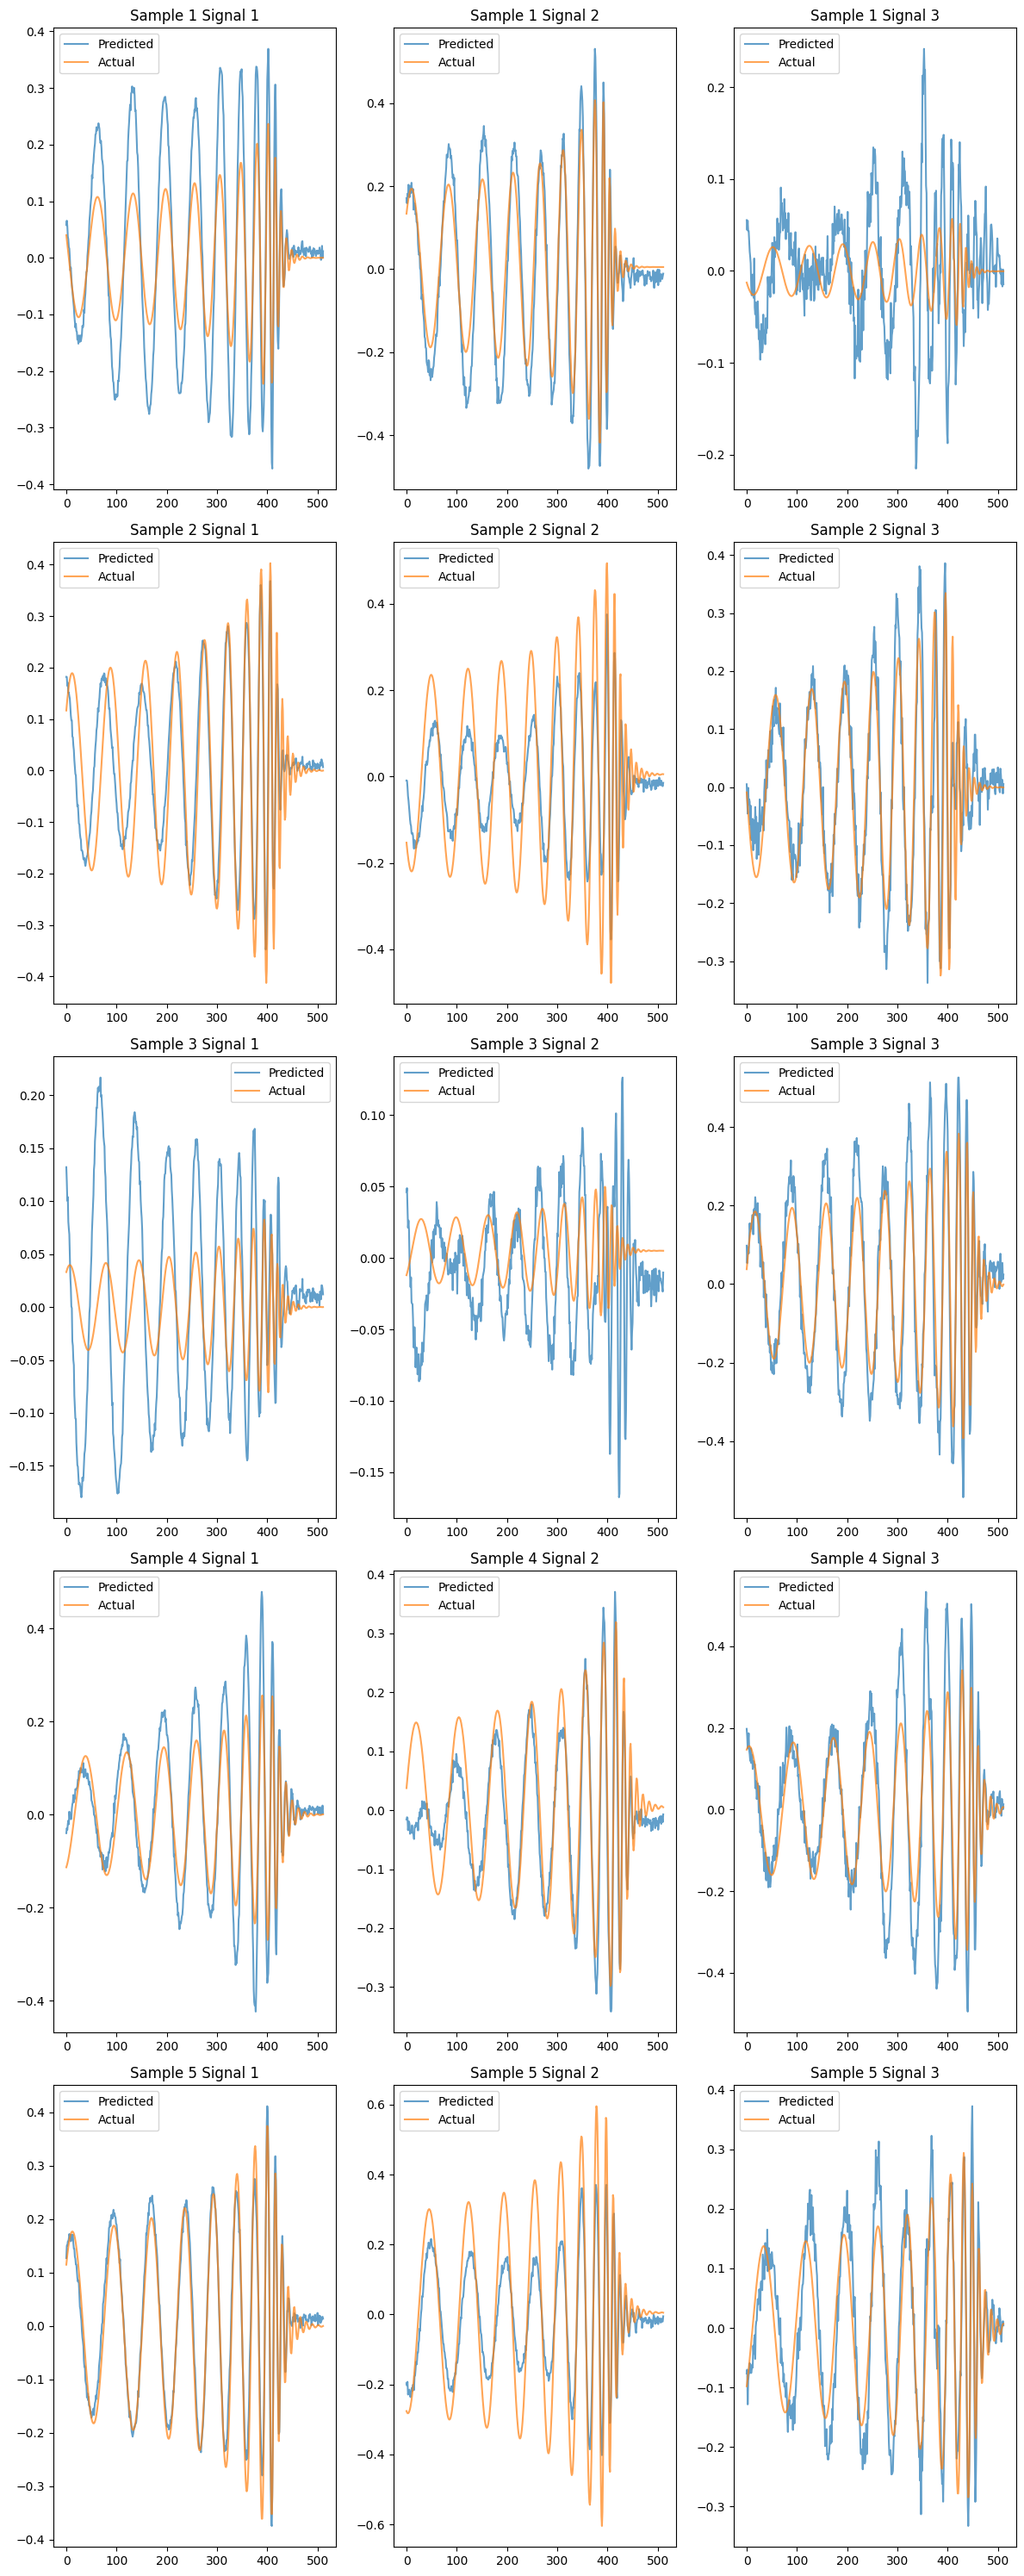

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, LSTM, Bidirectional
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale_data(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1
    
    h1_strain_scaled = scale_data(h1_strain)
    h1_signal_scaled = scale_data(h1_signal)
    l1_strain_scaled = scale_data(l1_strain)
    l1_signal_scaled = scale_data(l1_signal)
    v1_strain_scaled = scale_data(v1_strain)
    v1_signal_scaled = scale_data(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model1, X_test, y_test, num_samples=5):
    predictions = model1.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Define cumax function
def cumax(x):
    return tf.math.cumsum(tf.nn.softmax(x), axis=0)

# Define HGRN2Block
class HGRN2Block(Layer):
    def __init__(self, units, **kwargs):
        super(HGRN2Block, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(self.units,),
                                     initializer='zeros',
                                     trainable=True,
                                     name='gamma')
        self.forget_gate = Dense(self.units, activation='sigmoid')
        self.input_gate = Dense(self.units, activation='tanh')
        self.output_gate = Dense(input_shape[-1])
        super(HGRN2Block, self).build(input_shape)

    def call(self, inputs):
        # Calculate beta for forget gates
        beta = cumax(self.gamma)
        beta = beta - beta[0]  # Subtract to ensure the lower bound is zero for the first layer

        f_t = self.forget_gate(inputs)
        i_t = self.input_gate(inputs)
        o_t = self.output_gate(inputs)

        # Adjust forget gate with beta
        f_t = beta + (1 - beta) * f_t

        # Recurrent computation
        c_t = f_t * inputs + i_t
        h_t = o_t * c_t
        return h_t

    def compute_output_shape(self, input_shape):
        return input_shape

# Define BidirectionalxLSTMBlock
class BidirectionalxLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(BidirectionalxLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv1 = Conv1D(self.units, 1, padding='same', activation='relu')
        self.conv2 = Conv1D(input_shape[-1], 1, padding='same')  # Ensure output shape matches input shape
        self.dense = Dense(self.units)
        self.lstm = Bidirectional(LSTM(self.units, return_sequences=True))
        super(BidirectionalxLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv1(inputs)  # Up-projection
        x = tf.keras.layers.Activation('relu')(x)
        x = self.dense(x)  # Non-linear transformation
        x = self.lstm(x)  # Bidirectional LSTM
        x = self.conv2(x)  # Down-projection to match the input shape
        x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 2

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define branches
    def create_branch(input_layer):
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)

        # Apply HGRN2Block and BidirectionalxLSTMBlock
        x = HGRN2Block(16)(x)  # Ensure units match input features
        x = BidirectionalxLSTMBlock(16)(x)  # Ensure units match input features

        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output

    output_h1 = create_branch(input_h1)
    output_l1 = create_branch(input_l1)
    output_v1 = create_branch(input_v1)
    
    # Create model
    hgrn2model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    hgrn2model.compile(optimizer='adam', loss=custom_loss_fn)
    return hgrn2model

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    hgrn2model = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = hgrn2model.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    return hgrn2model

def evaluate_model(trained_model, test_file_path):
    # Load test data
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)

    # Predict signals
    predictions = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    # Combine all predictions and true values into single arrays
    all_y_true = np.concatenate([
        h1_signal_test.reshape(-1, 512, 1),
        l1_signal_test.reshape(-1, 512, 1),
        v1_signal_test.reshape(-1, 512, 1)
    ], axis=0)
    
    all_y_pred = np.concatenate(predictions, axis=0)
    
    # Compute metrics for combined data
    overlap, snr = compute_metrics(all_y_true, all_y_pred)
    
    print(f"Overall - Overlap: {overlap:.4f}, SNR: {snr:.4f}")
    
    # Optionally plot predictions
    plot_predictions(
        trained_model,
        [
            h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
            l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
            v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
        ],
        [
            h1_signal_test.reshape(-1, 512, 1),
            l1_signal_test.reshape(-1, 512, 1),
            v1_signal_test.reshape(-1, 512, 1)
        ]
    )

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)
evaluate_model(trained_model, test_file_path)

## Dense-xLSTM Mamba Model (Final)

Epoch 1/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 393s 144ms/step - loss: 0.2617 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 2/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 356s 142ms/step - loss: 0.0148 - val_loss: 0.0129 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Overall - Overlap: 0.7774, SNR: 3.7181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


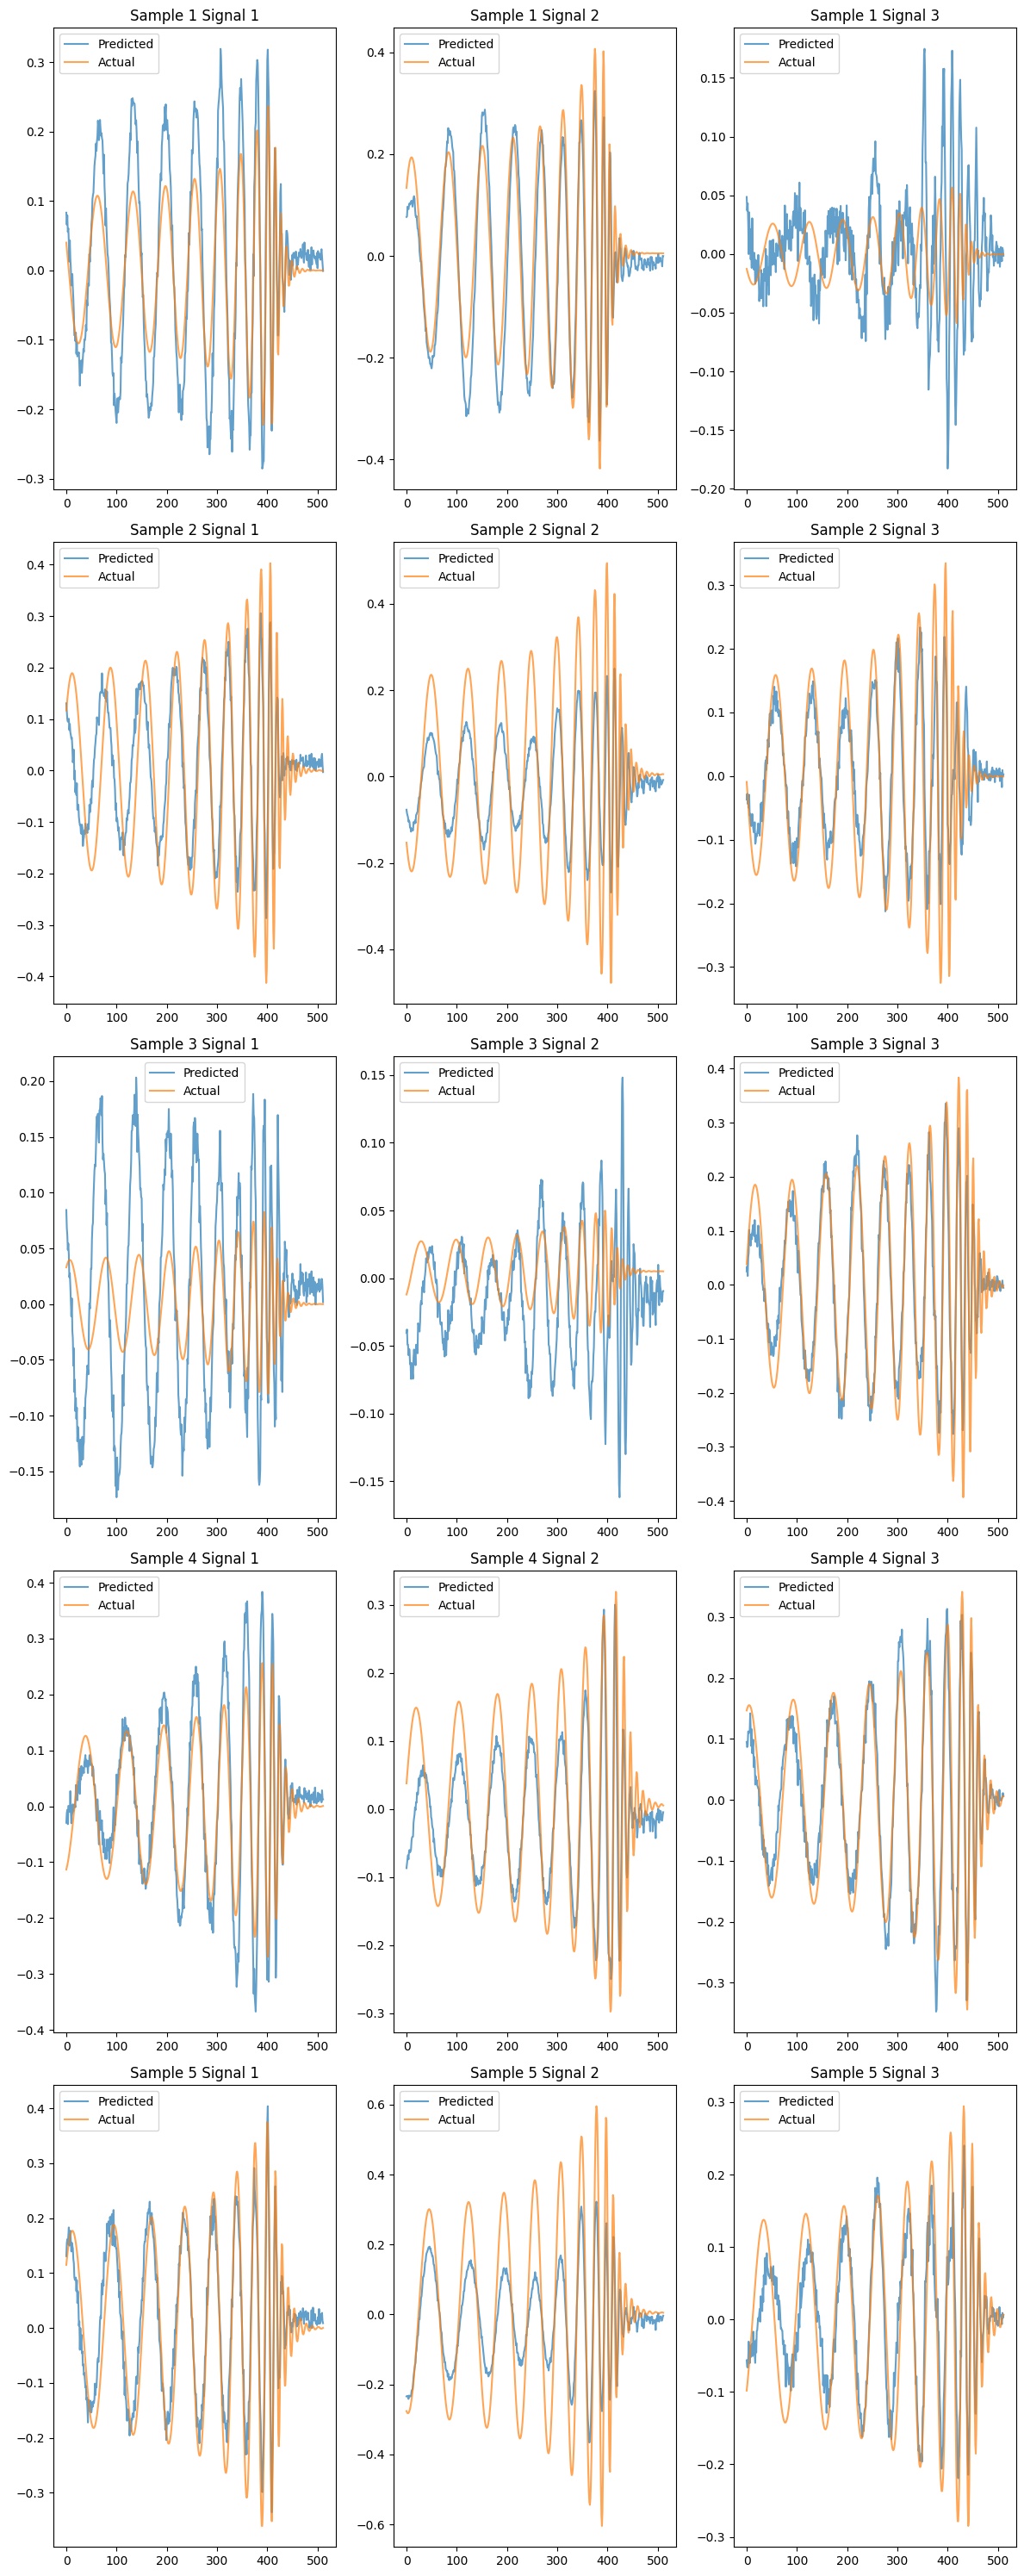

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, LSTM, Bidirectional, Add, LayerNormalization, BatchNormalization, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import tensorflow as tf

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale_data(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1
    
    h1_strain_scaled = scale_data(h1_strain)
    h1_signal_scaled = scale_data(h1_signal)
    l1_strain_scaled = scale_data(l1_strain)
    l1_signal_scaled = scale_data(l1_signal)
    v1_strain_scaled = scale_data(v1_strain)
    v1_signal_scaled = scale_data(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

# Function to plot predicted vs actual waveforms
def plot_predictions(model1, X_test, y_test, num_samples=5):
    predictions = model1.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

# Function to compute overlap and SNR
def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

# Function to calculate Fractal Tanimoto Coefficient with dynamic 'd'
def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    # Ensure FTC is bounded between 0 and 1
    return K.clip(ftc, 0, 1)

# Define the custom loss function with dynamic 'd'
def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        # Ensure the loss is positive
        return mse + (1 - ftc)  # Adjust the balance here as needed
    return loss_function

# Define the SiLU activation function
def silu(x):
    return x * tf.keras.activations.sigmoid(x)

class MambaBlock(Layer):
    def __init__(self, units, expansion_factor=2, **kwargs):
        super(MambaBlock, self).__init__(**kwargs)
        self.units = units
        self.expansion_factor = expansion_factor

    def build(self, input_shape):
        D = input_shape[-1]
        E = self.expansion_factor

        # Linear projections
        self.input_proj = Dense(E * D, use_bias=False)
        self.output_proj = Dense(D, use_bias=False)

        # SSM parameters
        self.SSM = Dense(D, use_bias=False)

        # Layer normalization
        self.layer_norm = LayerNormalization()

        super(MambaBlock, self).build(input_shape)

    def call(self, inputs):
        # Linear projection
        x = self.input_proj(inputs)
        x = tf.keras.layers.Activation(silu)(x)
        
        # SSM transformation
        x = self.SSM(x)
        x = tf.keras.layers.Activation(silu)(x)
        
        # Output projection
        x = self.output_proj(x)
        
        # Residual connection
        x = Add()([inputs, x])
        x = self.layer_norm(x)
        
        return x


# Define BidirectionalxLSTMBlock
class BidirectionalxLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(BidirectionalxLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv1 = Conv1D(self.units, 1, padding='same', activation='relu')
        self.conv2 = Conv1D(input_shape[-1], 1, padding='same')  # Ensure output shape matches input shape
        self.dense = Dense(self.units)
        self.lstm = Bidirectional(LSTM(self.units, return_sequences=True))
        super(BidirectionalxLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv1(inputs)  # Up-projection
        x = tf.keras.layers.Activation('relu')(x)
        x = self.dense(x)  # Non-linear transformation
        x = self.lstm(x)  # Bidirectional LSTM
        x = self.conv2(x)  # Down-projection to match the input shape
        x = tf.keras.layers.Add()([inputs, x])  # Residual connection
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

# Constants and parameters
epochs_per_d = 2

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % epochs_per_d == 0:
        return lr / 10
    return lr

def build_and_compile_model(input_shape, custom_loss_fn):
    # Define input layers
    input_h1 = Input(shape=input_shape)
    input_l1 = Input(shape=input_shape)
    input_v1 = Input(shape=input_shape)
    
    # Define branches
    def create_branch(input_layer):
        
        x = Conv1D(64, 3, activation='relu', padding='same')(input_layer)  # Increased filter size
        x = BatchNormalization()(x)  # Added BatchNormalization
        x = MaxPooling1D(pool_size=2)(x)
        
        x = Conv1D(32, 1, activation='tanh', padding='same')(input_layer)
        x = MaxPooling1D(pool_size=2)(x)
        x = BatchNormalization()(x)  # Added BatchNormalization
        
        x = Dropout(0.5)(x) 
        
        x = Conv1D(16, 1, activation='tanh', padding='same')(x)
        x = MaxPooling1D(pool_size=2)(x)

        # Apply MambaBlock and BidirectionalxLSTMBlock
        x = MambaBlock(64)(x)  # Mamba block
        x = MambaBlock(32)(x)  # Mamba block
        x = MambaBlock(16)(x)  # Stacking two Mamba blocks
        x = BidirectionalxLSTMBlock(64)(x)  # Ensure units match input features
        x = BidirectionalxLSTMBlock(32)(x)  # Ensure units match input features
        x = BidirectionalxLSTMBlock(16)(x)  # Ensure units match input features

        x = Flatten()(x)
        x = Dense(512)(x)
        output = Reshape((512, 1))(x)
        return output

    output_h1 = create_branch(input_h1)
    output_l1 = create_branch(input_l1)
    output_v1 = create_branch(input_v1)
    
    # Create model
    mambamodel = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
    mambamodel.compile(optimizer='adam', loss=custom_loss_fn)
    return mambamodel

def train_model(train_file_path, test_file_path):
    # Load training data
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)
    
    # Define input shape
    input_shape = (h1_strain_train.shape[1], 1)
    
    # Build and compile model
    mambamodel = build_and_compile_model(input_shape, custom_loss(0))
    
    # Train the model
    history = mambamodel.fit(
        [h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
         l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
         v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)],
        [h1_signal_train.reshape(-1, 512, 1),
         l1_signal_train.reshape(-1, 512, 1),
         v1_signal_train.reshape(-1, 512, 1)],
        epochs=epochs_per_d, batch_size=32, validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    return mambamodel

def evaluate_model(trained_model, test_file_path):
    # Load test data
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)

    # Predict signals
    predictions = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    # Combine all predictions and true values into single arrays
    all_y_true = np.concatenate([
        h1_signal_test.reshape(-1, 512, 1),
        l1_signal_test.reshape(-1, 512, 1),
        v1_signal_test.reshape(-1, 512, 1)
    ], axis=0)
    
    all_y_pred = np.concatenate(predictions, axis=0)
    
    # Compute metrics for combined data
    overlap, snr = compute_metrics(all_y_true, all_y_pred)
    
    print(f"Overall - Overlap: {overlap:.4f}, SNR: {snr:.4f}")
    
    # Optionally plot predictions
    plot_predictions(
        trained_model,
        [
            h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
            l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
            v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
        ],
        [
            h1_signal_test.reshape(-1, 512, 1),
            l1_signal_test.reshape(-1, 512, 1),
            v1_signal_test.reshape(-1, 512, 1)
        ]
    )

# Execute the training process
trained_model = train_model(train_file_path, test_file_path)
evaluate_model(trained_model, test_file_path)

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Layer, LSTM, Bidirectional, Add, LayerNormalization, BatchNormalization, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K
import keras_tuner as kt

# File paths
train_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr.hdf'
test_file_path = '/kaggle/input/gw-waveform-extraction-dataset/default_snr-20_test.hdf'

def load_pure_waveform_data(file_path):
    with h5py.File(file_path, 'r') as file:
        h1_strain = file['injection_samples/h1_strain'][:]
        h1_signal = file['injection_parameters/h1_signal'][:]
        l1_strain = file['injection_samples/l1_strain'][:]
        l1_signal = file['injection_parameters/l1_signal'][:]
        v1_strain = file['injection_samples/v1_strain'][:]
        v1_signal = file['injection_parameters/v1_signal'][:]
    
    # Rescale strain and signal to be between -1 and 1
    def scale_data(data):
        return (data - data.min()) / (data.max() - data.min()) * 2 - 1
    
    h1_strain_scaled = scale_data(h1_strain)
    h1_signal_scaled = scale_data(h1_signal)
    l1_strain_scaled = scale_data(l1_strain)
    l1_signal_scaled = scale_data(l1_signal)
    v1_strain_scaled = scale_data(v1_strain)
    v1_signal_scaled = scale_data(v1_signal)
    
    return h1_strain_scaled, h1_signal_scaled, l1_strain_scaled, l1_signal_scaled, v1_strain_scaled, v1_signal_scaled

def plot_predictions(model, X_test, y_test, num_samples=5):
    predictions = model.predict(X_test)
    fig, axs = plt.subplots(num_samples, 3, figsize=(12, 2*num_samples*3))
    
    for i in range(num_samples):
        for j in range(3):  # H1, L1, V1
            axs[i, j].plot(predictions[j][i].flatten(), label='Predicted', alpha=0.7)
            axs[i, j].plot(y_test[j][i].flatten(), label='Actual', alpha=0.7)
            axs[i, j].legend()
            axs[i, j].set_title(f'Sample {i+1} Signal {j+1}')
    
    plt.tight_layout()
    plt.show()

def compute_metrics(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)  # Reshape y_true to match y_pred
    overlap = np.sum(y_true * y_pred) / (np.sqrt(np.sum(y_true**2)) * np.sqrt(np.sum(y_pred**2)))
    snr = 10 * np.log10(np.mean(y_true**2) / np.mean((y_true - y_pred)**2))
    return overlap, snr

def fractal_tanimoto_coefficient(y_true, y_pred, d):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    numerator = K.sum(y_true * y_pred)
    denominator = K.sum(K.square(y_true)) + K.sum(K.square(y_pred)) - numerator
    ftc = numerator / (denominator + K.epsilon())**d
    return K.clip(ftc, 0, 1)

def custom_loss(d):
    def loss_function(y_true, y_pred):
        mse = K.mean(K.square(y_true - y_pred))
        ftc = fractal_tanimoto_coefficient(y_true, y_pred, d)
        return mse + (1 - ftc)
    return loss_function

def silu(x):
    return x * tf.keras.activations.sigmoid(x)

class MambaBlock(Layer):
    def __init__(self, units, expansion_factor=2, **kwargs):
        super(MambaBlock, self).__init__(**kwargs)
        self.units = units
        self.expansion_factor = expansion_factor

    def build(self, input_shape):
        D = input_shape[-1]
        E = self.expansion_factor
        self.input_proj = Dense(E * D, use_bias=False)
        self.output_proj = Dense(D, use_bias=False)
        self.SSM = Dense(D, use_bias=False)
        self.layer_norm = LayerNormalization()
        super(MambaBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.input_proj(inputs)
        x = tf.keras.layers.Activation(silu)(x)
        x = self.SSM(x)
        x = tf.keras.layers.Activation(silu)(x)
        x = self.output_proj(x)
        x = Add()([inputs, x])
        x = self.layer_norm(x)
        return x

class BidirectionalxLSTMBlock(Layer):
    def __init__(self, units, **kwargs):
        super(BidirectionalxLSTMBlock, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.conv1 = Conv1D(self.units, 1, padding='same', activation='relu')
        self.conv2 = Conv1D(input_shape[-1], 1, padding='same')
        self.dense = Dense(self.units)
        self.lstm = Bidirectional(LSTM(self.units, return_sequences=True))
        super(BidirectionalxLSTMBlock, self).build(input_shape)

    def call(self, inputs):
        x = self.conv1(inputs)
        x = tf.keras.layers.Activation('relu')(x)
        x = self.dense(x)
        x = self.lstm(x)
        x = self.conv2(x)
        x = Add()([inputs, x])
        return x

    def compute_output_shape(self, input_shape):
        return input_shape

class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        input_shape = (512, 1)  # Example input shape, adjust as needed

        # Define input layers
        input_h1 = Input(shape=input_shape)
        input_l1 = Input(shape=input_shape)
        input_v1 = Input(shape=input_shape)

        def create_branch(input_layer):
            x = Conv1D(hp.Int('conv1_filters', min_value=32, max_value=64, step=16), 3, activation='relu', padding='same')(input_layer)
            x = BatchNormalization()(x)
            x = MaxPooling1D(pool_size=2)(x)
            
            x = Conv1D(hp.Int('conv2_filters', min_value=16, max_value=32, step=8), 1, activation='tanh', padding='same')(x)
            x = MaxPooling1D(pool_size=2)(x)
            x = BatchNormalization()(x)
            
            x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
            
            x = Conv1D(hp.Int('conv3_filters', min_value=8, max_value=16, step=4), 1, activation='tanh', padding='same')(x)
            x = MaxPooling1D(pool_size=2)(x)

            x = MambaBlock(hp.Int('mamba_units', min_value=16, max_value=64, step=16))(x)
            x = MambaBlock(hp.Int('mamba_units', min_value=16, max_value=64, step=16))(x)
            x = BidirectionalxLSTMBlock(hp.Int('lstm_units', min_value=16, max_value=64, step=16))(x)

            x = Flatten()(x)
            x = Dense(512, activation='relu')(x)
            output = Reshape((512, 1))(x)
            return output

        output_h1 = create_branch(input_h1)
        output_l1 = create_branch(input_l1)
        output_v1 = create_branch(input_v1)

        model = Model(inputs=[input_h1, input_l1, input_v1], outputs=[output_h1, output_l1, output_v1])
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
            loss=custom_loss(hp.Float('loss_d', min_value=0.1, max_value=1.0, step=0.1))
        )
        return model

def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 2 == 0:
        return lr / 10
    return lr

def train_model():
    h1_strain_train, h1_signal_train, l1_strain_train, l1_signal_train, v1_strain_train, v1_signal_train = load_pure_waveform_data(train_file_path)

    X_train = [
        h1_strain_train.reshape(-1, h1_strain_train.shape[1], 1),
        l1_strain_train.reshape(-1, l1_strain_train.shape[1], 1),
        v1_strain_train.reshape(-1, v1_strain_train.shape[1], 1)
    ]
    y_train = [
        h1_signal_train.reshape(-1, 512, 1),
        l1_signal_train.reshape(-1, 512, 1),
        v1_signal_train.reshape(-1, 512, 1)
    ]

    tuner = kt.RandomSearch(
        hypermodel=MyHyperModel(),
        objective='val_loss',
        max_trials=10,
        executions_per_trial=3,
        directory='kt_dir',
        project_name='waveform_tuning'
    )

    tuner.search(
        X_train,
        y_train,
        epochs=10,  # Adjust epochs for tuning
        batch_size=32,
        validation_split=0.2,
        callbacks=[LearningRateScheduler(lr_schedule)]
    )

    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model

def evaluate_model(trained_model):
    h1_strain_test, h1_signal_test, l1_strain_test, l1_signal_test, v1_strain_test, v1_signal_test = load_pure_waveform_data(test_file_path)

    predictions = trained_model.predict([
        h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
        l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
        v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
    ])
    
    all_y_true = np.concatenate([
        h1_signal_test.reshape(-1, 512, 1),
        l1_signal_test.reshape(-1, 512, 1),
        v1_signal_test.reshape(-1, 512, 1)
    ], axis=0)
    
    all_y_pred = np.concatenate(predictions, axis=0)
    
    overlap, snr = compute_metrics(all_y_true, all_y_pred)
    
    print(f"Overall - Overlap: {overlap:.4f}, SNR: {snr:.4f}")
    
    plot_predictions(
        trained_model,
        [
            h1_strain_test.reshape(-1, h1_strain_test.shape[1], 1),
            l1_strain_test.reshape(-1, l1_strain_test.shape[1], 1),
            v1_strain_test.reshape(-1, v1_strain_test.shape[1], 1)
        ],
        [
            h1_signal_test.reshape(-1, 512, 1),
            l1_signal_test.reshape(-1, 512, 1),
            v1_signal_test.reshape(-1, 512, 1)
        ]
    )

# Execute the training and evaluation process
trained_model = train_model()
evaluate_model(trained_model)